In [1]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.7 MB/s eta 0:00:00


In [2]:
#create samples :
import os
import torch
import pickle
import pandas as pd

def load_graph(path, is_pickle=True):
    """
    Load a molecule graph (.pkl) or a protein graph (.pt).
    If is_pickle is True, use pickle to load the file; otherwise, use torch.load.
    """
    if is_pickle:
        with open(path, 'rb') as f:
            return pickle.load(f)
    else:
        return torch.load(path)

def prepare_dataset_individual_save_as_pt(filtered_dataset, molecule_graph_dir, protein_graph_dir, output_dir):
    """
    Incrementally prepares the dataset and saves each (molecule, protein, target) tuple as a separate .pt file.

    Args:
    - filtered_dataset: The filtered KIBA dataset (DataFrame).
    - molecule_graph_dir: Directory where molecule graphs are stored.
    - protein_graph_dir: Directory where protein graphs are stored.
    - output_dir: Directory to save the prepared dataset incrementally.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for index, row in filtered_dataset.iterrows():
        protein_id = row['Target_ID']
        chembl_id = row['Drug_ID']

        # Load the protein graph (.pt)
        pro_graph_path = os.path.join(protein_graph_dir, f"{protein_id}_graph.pt")
        if not os.path.exists(pro_graph_path):
            print(f"Protein graph not found: {protein_id}")
            continue
        pro_graph = load_graph(pro_graph_path, is_pickle=False)

        # Load the molecule graph (.pkl)
        mol_graph_path = os.path.join(molecule_graph_dir, f"{chembl_id}_graph.pkl")
        if not os.path.exists(mol_graph_path):
            print(f"Molecule graph not found: {chembl_id}")
            continue
        mol_graph = load_graph(mol_graph_path)

        # Load target (affinity value)
        target = torch.tensor([row['Y']], dtype=torch.float)

        # Create the sample as a tuple (molecule graph, protein graph, target)
        sample = (mol_graph, pro_graph, target)

        # Save the sample as a .pt file
        sample_path = os.path.join(output_dir, f"sample_{index}.pt")
        torch.save(sample, sample_path)

        if(index%10000 == 0 ):
            print(f"Saved sample {index} as {sample_path}")




# Example usage for individual saving
molecule_graph_dir = '/kaggle/input/graphs/molecule_graphs'  # Directory where molecule graphs are stored
protein_graph_dir = '/kaggle/input/graphs/ProteinGraphs'  # Directory where protein graphs are stored
filtered_dataset_path = '/kaggle/input/graphs/filtered_DavisDataSet.csv'  # Path to the filtered dataset CSV
output_dir = 'prepared_samples/'  # Directory to save individual samples

# Load filtered dataset CSV
filtered_dataset = pd.read_csv(filtered_dataset_path)

# Prepare the dataset incrementally, saving each sample as a .pt file
prepare_dataset_individual_save_as_pt(filtered_dataset, molecule_graph_dir, protein_graph_dir, output_dir)

print("Dataset preparation completed.")


<ipython-input-2-c90b9d14e3c5>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(path)


Saved sample 0 as prepared_samples/sample_0.pt


<ipython-input-2-c90b9d14e3c5>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(path)


Saved sample 10000 as prepared_samples/sample_10000.pt
Dataset preparation completed.


Running on cuda.
Checkpoints will be saved to: /kaggle/working/TrainingModel1
Starting fresh metrics tracking.
GNNNet Loaded
No existing checkpoint found; starting fresh.


Training:   0%|          | 0/250 [00:56<?, ?epoch/s]

[Epoch 1/250] Training Loss: 1.4928


Training:   0%|          | 1/250 [02:27<10:11:33, 147.37s/epoch]

  Train => MSE=0.7097, CI=0.6860, Pearson=0.3206
  Test  => MSE=0.7479, CI=0.6946, Pearson=0.3445
Checkpoint saved at epoch 1


Training:   0%|          | 1/250 [03:20<10:11:33, 147.37s/epoch]

[Epoch 2/250] Training Loss: 0.8014


Training:   1%|          | 2/250 [04:49<9:55:21, 144.04s/epoch] 

  Train => MSE=0.6192, CI=0.7136, Pearson=0.4293
  Test  => MSE=0.6355, CI=0.7263, Pearson=0.4619
Checkpoint saved at epoch 2
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch1.pt


Training:   1%|          | 2/250 [05:42<9:55:21, 144.04s/epoch]

[Epoch 3/250] Training Loss: 0.7662


Training:   1%|          | 3/250 [07:11<9:49:24, 143.17s/epoch]

  Train => MSE=0.7451, CI=0.7267, Pearson=0.4632
  Test  => MSE=0.7693, CI=0.7376, Pearson=0.4910
Checkpoint saved at epoch 3
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch2.pt


Training:   1%|          | 3/250 [08:05<9:49:24, 143.17s/epoch]

[Epoch 4/250] Training Loss: 0.6975


Training:   2%|▏         | 4/250 [09:33<9:45:07, 142.71s/epoch]

  Train => MSE=0.5881, CI=0.7326, Pearson=0.4808
  Test  => MSE=0.6013, CI=0.7427, Pearson=0.5058
Checkpoint saved at epoch 4
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch3.pt


Training:   2%|▏         | 4/250 [10:27<9:45:07, 142.71s/epoch]

[Epoch 5/250] Training Loss: 0.6709


Training:   2%|▏         | 5/250 [11:55<9:42:20, 142.61s/epoch]

  Train => MSE=0.6915, CI=0.7417, Pearson=0.5066
  Test  => MSE=0.7125, CI=0.7472, Pearson=0.5257
Checkpoint saved at epoch 5
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch4.pt


Training:   2%|▏         | 5/250 [12:51<9:42:20, 142.61s/epoch]

[Epoch 6/250] Training Loss: 0.6490


Training:   2%|▏         | 6/250 [14:18<9:40:47, 142.82s/epoch]

  Train => MSE=0.5557, CI=0.7418, Pearson=0.4999
  Test  => MSE=0.5692, CI=0.7498, Pearson=0.5212
Checkpoint saved at epoch 6
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch5.pt


Training:   2%|▏         | 6/250 [15:11<9:40:47, 142.82s/epoch]

[Epoch 7/250] Training Loss: 0.7086


Training:   3%|▎         | 7/250 [16:39<9:36:00, 142.22s/epoch]

  Train => MSE=0.6830, CI=0.7181, Pearson=0.4609
  Test  => MSE=0.6996, CI=0.7300, Pearson=0.4910
Checkpoint saved at epoch 7
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch6.pt


Training:   3%|▎         | 7/250 [17:34<9:36:00, 142.22s/epoch]

[Epoch 8/250] Training Loss: 0.6495


Training:   3%|▎         | 8/250 [19:02<9:33:49, 142.27s/epoch]

  Train => MSE=0.5760, CI=0.7473, Pearson=0.5130
  Test  => MSE=0.5932, CI=0.7541, Pearson=0.5338
Checkpoint saved at epoch 8
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch7.pt


Training:   3%|▎         | 8/250 [19:56<9:33:49, 142.27s/epoch]

[Epoch 9/250] Training Loss: 0.6263


Training:   4%|▎         | 9/250 [21:24<9:31:00, 142.16s/epoch]

  Train => MSE=0.5473, CI=0.7493, Pearson=0.5264
  Test  => MSE=0.5777, CI=0.7531, Pearson=0.5254
Checkpoint saved at epoch 9
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch8.pt


Training:   4%|▎         | 9/250 [22:19<9:31:00, 142.16s/epoch]

[Epoch 10/250] Training Loss: 0.6171


Training:   4%|▍         | 10/250 [23:47<9:30:08, 142.53s/epoch]

  Train => MSE=0.5365, CI=0.7555, Pearson=0.5378
  Test  => MSE=0.5564, CI=0.7599, Pearson=0.5472
Checkpoint saved at epoch 10
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch9.pt


Training:   4%|▍         | 10/250 [24:41<9:30:08, 142.53s/epoch]

[Epoch 11/250] Training Loss: 0.6275


Training:   4%|▍         | 11/250 [26:09<9:26:46, 142.29s/epoch]

  Train => MSE=0.6400, CI=0.7640, Pearson=0.5565
  Test  => MSE=0.6785, CI=0.7649, Pearson=0.5511
Checkpoint saved at epoch 11
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch10.pt


Training:   4%|▍         | 11/250 [27:04<9:26:46, 142.29s/epoch]

[Epoch 12/250] Training Loss: 0.6107


Training:   5%|▍         | 12/250 [28:32<9:25:44, 142.63s/epoch]

  Train => MSE=0.5189, CI=0.7678, Pearson=0.5629
  Test  => MSE=0.5480, CI=0.7699, Pearson=0.5610
Checkpoint saved at epoch 12
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch11.pt


Training:   5%|▍         | 12/250 [29:26<9:25:44, 142.63s/epoch]

[Epoch 13/250] Training Loss: 0.5979


Training:   5%|▌         | 13/250 [30:56<9:25:04, 143.06s/epoch]

  Train => MSE=0.5508, CI=0.7639, Pearson=0.5441
  Test  => MSE=0.5682, CI=0.7719, Pearson=0.5551
Checkpoint saved at epoch 13
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch12.pt


Training:   5%|▌         | 13/250 [31:50<9:25:04, 143.06s/epoch]

[Epoch 14/250] Training Loss: 0.5956


Training:   6%|▌         | 14/250 [33:20<9:24:04, 143.41s/epoch]

  Train => MSE=0.5202, CI=0.7732, Pearson=0.5740
  Test  => MSE=0.5471, CI=0.7770, Pearson=0.5734
Checkpoint saved at epoch 14
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch13.pt


Training:   6%|▌         | 14/250 [34:16<9:24:04, 143.41s/epoch]

[Epoch 15/250] Training Loss: 0.6000


Training:   6%|▌         | 15/250 [35:46<9:23:58, 143.99s/epoch]

  Train => MSE=0.5017, CI=0.7745, Pearson=0.5786
  Test  => MSE=0.5322, CI=0.7753, Pearson=0.5749
Checkpoint saved at epoch 15
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch14.pt


Training:   6%|▌         | 15/250 [36:40<9:23:58, 143.99s/epoch]

[Epoch 16/250] Training Loss: 0.5921


Training:   6%|▋         | 16/250 [38:10<9:22:02, 144.11s/epoch]

  Train => MSE=0.5298, CI=0.7754, Pearson=0.5692
  Test  => MSE=0.5538, CI=0.7811, Pearson=0.5720
Checkpoint saved at epoch 16
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch15.pt


Training:   6%|▋         | 16/250 [39:05<9:22:02, 144.11s/epoch]

[Epoch 17/250] Training Loss: 0.5932


Training:   7%|▋         | 17/250 [40:35<9:19:55, 144.19s/epoch]

  Train => MSE=0.5120, CI=0.7815, Pearson=0.5874
  Test  => MSE=0.5420, CI=0.7830, Pearson=0.5834
Checkpoint saved at epoch 17
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch16.pt


Training:   7%|▋         | 17/250 [41:28<9:19:55, 144.19s/epoch]

[Epoch 18/250] Training Loss: 0.5804


Training:   7%|▋         | 18/250 [42:58<9:16:11, 143.84s/epoch]

  Train => MSE=0.5001, CI=0.7831, Pearson=0.5945
  Test  => MSE=0.5377, CI=0.7827, Pearson=0.5820
Checkpoint saved at epoch 18
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch17.pt


Training:   7%|▋         | 18/250 [43:54<9:16:11, 143.84s/epoch]

[Epoch 19/250] Training Loss: 0.5777


Training:   8%|▊         | 19/250 [45:25<9:17:46, 144.87s/epoch]

  Train => MSE=0.5571, CI=0.7828, Pearson=0.5712
  Test  => MSE=0.5828, CI=0.7854, Pearson=0.5726
Checkpoint saved at epoch 19
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch18.pt


Training:   8%|▊         | 19/250 [46:20<9:17:46, 144.87s/epoch]

[Epoch 20/250] Training Loss: 0.5560


Training:   8%|▊         | 20/250 [47:51<9:16:14, 145.11s/epoch]

  Train => MSE=0.5110, CI=0.7857, Pearson=0.5956
  Test  => MSE=0.5530, CI=0.7833, Pearson=0.5783
Checkpoint saved at epoch 20
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch19.pt


Training:   8%|▊         | 20/250 [48:47<9:16:14, 145.11s/epoch]

[Epoch 21/250] Training Loss: 0.5600


Training:   8%|▊         | 21/250 [50:18<9:17:04, 145.96s/epoch]

  Train => MSE=0.5129, CI=0.7889, Pearson=0.6147
  Test  => MSE=0.5516, CI=0.7882, Pearson=0.6010
Checkpoint saved at epoch 21
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch20.pt


Training:   8%|▊         | 21/250 [51:14<9:17:04, 145.96s/epoch]

[Epoch 22/250] Training Loss: 0.5462


Training:   9%|▉         | 22/250 [52:44<9:14:42, 145.98s/epoch]

  Train => MSE=0.4903, CI=0.7852, Pearson=0.5975
  Test  => MSE=0.5300, CI=0.7832, Pearson=0.5843
Checkpoint saved at epoch 22
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch21.pt


Training:   9%|▉         | 22/250 [53:43<9:14:42, 145.98s/epoch]

[Epoch 23/250] Training Loss: 0.5352


Training:   9%|▉         | 23/250 [55:14<9:16:12, 147.01s/epoch]

  Train => MSE=0.4664, CI=0.7894, Pearson=0.6112
  Test  => MSE=0.5106, CI=0.7843, Pearson=0.5929
Checkpoint saved at epoch 23
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch22.pt


Training:   9%|▉         | 23/250 [56:11<9:16:12, 147.01s/epoch]

[Epoch 24/250] Training Loss: 0.5443


Training:  10%|▉         | 24/250 [57:42<9:15:07, 147.38s/epoch]

  Train => MSE=0.4701, CI=0.7879, Pearson=0.6081
  Test  => MSE=0.5268, CI=0.7798, Pearson=0.5781
Checkpoint saved at epoch 24
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch23.pt


Training:  10%|▉         | 24/250 [58:38<9:15:07, 147.38s/epoch]

[Epoch 25/250] Training Loss: 0.5524


Training:  10%|█         | 25/250 [1:00:09<9:11:42, 147.12s/epoch]

  Train => MSE=0.5076, CI=0.7765, Pearson=0.6002
  Test  => MSE=0.5423, CI=0.7769, Pearson=0.5926
Checkpoint saved at epoch 25
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch24.pt


Training:  10%|█         | 25/250 [1:01:06<9:11:42, 147.12s/epoch]

[Epoch 26/250] Training Loss: 0.5316


Training:  10%|█         | 26/250 [1:02:36<9:09:43, 147.25s/epoch]

  Train => MSE=0.4719, CI=0.7899, Pearson=0.6219
  Test  => MSE=0.5223, CI=0.7883, Pearson=0.6029
Checkpoint saved at epoch 26
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch25.pt


Training:  10%|█         | 26/250 [1:03:34<9:09:43, 147.25s/epoch]

[Epoch 27/250] Training Loss: 0.5341


Training:  11%|█         | 27/250 [1:05:04<9:08:19, 147.53s/epoch]

  Train => MSE=0.5039, CI=0.7868, Pearson=0.6232
  Test  => MSE=0.5445, CI=0.7851, Pearson=0.6074
Checkpoint saved at epoch 27
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch26.pt


Training:  11%|█         | 27/250 [1:06:01<9:08:19, 147.53s/epoch]

[Epoch 28/250] Training Loss: 0.5244


Training:  11%|█         | 28/250 [1:07:32<9:05:32, 147.44s/epoch]

  Train => MSE=0.4434, CI=0.8003, Pearson=0.6489
  Test  => MSE=0.4919, CI=0.7962, Pearson=0.6234
Checkpoint saved at epoch 28
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch27.pt


Training:  11%|█         | 28/250 [1:08:28<9:05:32, 147.44s/epoch]

[Epoch 29/250] Training Loss: 0.5187


Training:  12%|█▏        | 29/250 [1:09:58<9:02:23, 147.26s/epoch]

  Train => MSE=0.4331, CI=0.7981, Pearson=0.6499
  Test  => MSE=0.4895, CI=0.7913, Pearson=0.6201
Checkpoint saved at epoch 29
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch28.pt


Training:  12%|█▏        | 29/250 [1:10:54<9:02:23, 147.26s/epoch]

[Epoch 30/250] Training Loss: 0.5257


Training:  12%|█▏        | 30/250 [1:12:25<8:59:00, 147.00s/epoch]

  Train => MSE=0.4276, CI=0.8014, Pearson=0.6491
  Test  => MSE=0.4777, CI=0.7933, Pearson=0.6208
Checkpoint saved at epoch 30
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch29.pt


Training:  12%|█▏        | 30/250 [1:13:21<8:59:00, 147.00s/epoch]

[Epoch 31/250] Training Loss: 0.5155


Training:  12%|█▏        | 31/250 [1:14:51<8:56:05, 146.87s/epoch]

  Train => MSE=0.4363, CI=0.7995, Pearson=0.6483
  Test  => MSE=0.4912, CI=0.7920, Pearson=0.6199
Checkpoint saved at epoch 31
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch30.pt


Training:  12%|█▏        | 31/250 [1:15:47<8:56:05, 146.87s/epoch]

[Epoch 32/250] Training Loss: 0.5395


Training:  13%|█▎        | 32/250 [1:17:18<8:53:43, 146.90s/epoch]

  Train => MSE=0.4593, CI=0.7985, Pearson=0.6460
  Test  => MSE=0.5009, CI=0.7930, Pearson=0.6267
Checkpoint saved at epoch 32
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch31.pt


Training:  13%|█▎        | 32/250 [1:18:17<8:53:43, 146.90s/epoch]

[Epoch 33/250] Training Loss: 0.5085


Training:  13%|█▎        | 33/250 [1:19:47<8:53:34, 147.53s/epoch]

  Train => MSE=0.4611, CI=0.8009, Pearson=0.6539
  Test  => MSE=0.5091, CI=0.7941, Pearson=0.6315
Checkpoint saved at epoch 33
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch32.pt


Training:  13%|█▎        | 33/250 [1:20:44<8:53:34, 147.53s/epoch]

[Epoch 34/250] Training Loss: 0.5081


Training:  14%|█▎        | 34/250 [1:22:15<8:50:55, 147.48s/epoch]

  Train => MSE=0.4838, CI=0.8036, Pearson=0.6633
  Test  => MSE=0.5405, CI=0.7990, Pearson=0.6298
Checkpoint saved at epoch 34
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch33.pt


Training:  14%|█▎        | 34/250 [1:23:11<8:50:55, 147.48s/epoch]

[Epoch 35/250] Training Loss: 0.5036


Training:  14%|█▍        | 35/250 [1:24:42<8:48:43, 147.55s/epoch]

  Train => MSE=0.4466, CI=0.8065, Pearson=0.6530
  Test  => MSE=0.4946, CI=0.8020, Pearson=0.6314
Checkpoint saved at epoch 35
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch34.pt


Training:  14%|█▍        | 35/250 [1:25:38<8:48:43, 147.55s/epoch]

[Epoch 36/250] Training Loss: 0.5004


Training:  14%|█▍        | 36/250 [1:27:08<8:44:21, 147.02s/epoch]

  Train => MSE=0.4654, CI=0.8016, Pearson=0.6489
  Test  => MSE=0.5226, CI=0.7952, Pearson=0.6193
Checkpoint saved at epoch 36
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch35.pt


Training:  14%|█▍        | 36/250 [1:28:05<8:44:21, 147.02s/epoch]

[Epoch 37/250] Training Loss: 0.5085


Training:  15%|█▍        | 37/250 [1:29:35<8:42:04, 147.06s/epoch]

  Train => MSE=0.4163, CI=0.8121, Pearson=0.6824
  Test  => MSE=0.4757, CI=0.8034, Pearson=0.6463
Checkpoint saved at epoch 37
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch36.pt


Training:  15%|█▍        | 37/250 [1:30:31<8:42:04, 147.06s/epoch]

[Epoch 38/250] Training Loss: 0.5135


Training:  15%|█▌        | 38/250 [1:32:01<8:38:24, 146.72s/epoch]

  Train => MSE=0.4191, CI=0.8115, Pearson=0.6720
  Test  => MSE=0.4788, CI=0.8033, Pearson=0.6365
Checkpoint saved at epoch 38
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch37.pt


Training:  15%|█▌        | 38/250 [1:32:57<8:38:24, 146.72s/epoch]

[Epoch 39/250] Training Loss: 0.4896


Training:  16%|█▌        | 39/250 [1:34:28<8:35:44, 146.65s/epoch]

  Train => MSE=0.4614, CI=0.8089, Pearson=0.6639
  Test  => MSE=0.5306, CI=0.8010, Pearson=0.6249
Checkpoint saved at epoch 39
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch38.pt


Training:  16%|█▌        | 39/250 [1:35:24<8:35:44, 146.65s/epoch]

[Epoch 40/250] Training Loss: 0.4905


Training:  16%|█▌        | 40/250 [1:36:55<8:33:31, 146.72s/epoch]

  Train => MSE=0.4014, CI=0.8132, Pearson=0.6765
  Test  => MSE=0.4542, CI=0.8057, Pearson=0.6469
Checkpoint saved at epoch 40
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch39.pt


Training:  16%|█▌        | 40/250 [1:37:52<8:33:31, 146.72s/epoch]

[Epoch 41/250] Training Loss: 0.4897


Training:  16%|█▋        | 41/250 [1:39:22<8:31:54, 146.96s/epoch]

  Train => MSE=0.4052, CI=0.8096, Pearson=0.6804
  Test  => MSE=0.4608, CI=0.8052, Pearson=0.6512
Checkpoint saved at epoch 41
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch40.pt


Training:  16%|█▋        | 41/250 [1:40:19<8:31:54, 146.96s/epoch]

[Epoch 42/250] Training Loss: 0.4829


Training:  17%|█▋        | 42/250 [1:41:50<8:30:43, 147.32s/epoch]

  Train => MSE=0.4155, CI=0.8104, Pearson=0.6699
  Test  => MSE=0.4793, CI=0.8002, Pearson=0.6351
Checkpoint saved at epoch 42
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch41.pt


Training:  17%|█▋        | 42/250 [1:42:47<8:30:43, 147.32s/epoch]

[Epoch 43/250] Training Loss: 0.4773


Training:  17%|█▋        | 43/250 [1:44:18<8:28:16, 147.33s/epoch]

  Train => MSE=0.4004, CI=0.8166, Pearson=0.6835
  Test  => MSE=0.4637, CI=0.8071, Pearson=0.6474
Checkpoint saved at epoch 43
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch42.pt


Training:  17%|█▋        | 43/250 [1:45:16<8:28:16, 147.33s/epoch]

[Epoch 44/250] Training Loss: 0.4663


Training:  18%|█▊        | 44/250 [1:46:46<8:27:00, 147.67s/epoch]

  Train => MSE=0.3851, CI=0.8197, Pearson=0.6945
  Test  => MSE=0.4473, CI=0.8110, Pearson=0.6576
Checkpoint saved at epoch 44
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch43.pt


Training:  18%|█▊        | 44/250 [1:47:42<8:27:00, 147.67s/epoch]

[Epoch 45/250] Training Loss: 0.4734


Training:  18%|█▊        | 45/250 [1:49:13<8:24:04, 147.53s/epoch]

  Train => MSE=0.4077, CI=0.8173, Pearson=0.6918
  Test  => MSE=0.4627, CI=0.8098, Pearson=0.6593
Checkpoint saved at epoch 45
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch44.pt


Training:  18%|█▊        | 45/250 [1:50:10<8:24:04, 147.53s/epoch]

[Epoch 46/250] Training Loss: 0.4557


Training:  18%|█▊        | 46/250 [1:51:41<8:21:16, 147.44s/epoch]

  Train => MSE=0.3877, CI=0.8185, Pearson=0.6957
  Test  => MSE=0.4477, CI=0.8088, Pearson=0.6627
Checkpoint saved at epoch 46
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch45.pt


Training:  18%|█▊        | 46/250 [1:52:40<8:21:16, 147.44s/epoch]

[Epoch 47/250] Training Loss: 0.4547


Training:  19%|█▉        | 47/250 [1:54:10<8:20:48, 148.02s/epoch]

  Train => MSE=0.3727, CI=0.8204, Pearson=0.7037
  Test  => MSE=0.4305, CI=0.8130, Pearson=0.6682
Checkpoint saved at epoch 47
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch46.pt


Training:  19%|█▉        | 47/250 [1:55:07<8:20:48, 148.02s/epoch]

[Epoch 48/250] Training Loss: 0.4565


Training:  19%|█▉        | 48/250 [1:56:38<8:18:00, 147.92s/epoch]

  Train => MSE=0.3749, CI=0.8180, Pearson=0.7036
  Test  => MSE=0.4364, CI=0.8117, Pearson=0.6656
Checkpoint saved at epoch 48
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch47.pt


Training:  19%|█▉        | 48/250 [1:57:32<8:18:00, 147.92s/epoch]

[Epoch 49/250] Training Loss: 0.4634


Training:  20%|█▉        | 49/250 [1:59:02<8:11:57, 146.85s/epoch]

  Train => MSE=0.4021, CI=0.8113, Pearson=0.6765
  Test  => MSE=0.4524, CI=0.8044, Pearson=0.6492
Checkpoint saved at epoch 49
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch48.pt


Training:  20%|█▉        | 49/250 [1:59:58<8:11:57, 146.85s/epoch]

[Epoch 50/250] Training Loss: 0.4494


Training:  20%|██        | 50/250 [2:01:29<8:09:12, 146.76s/epoch]

  Train => MSE=0.3812, CI=0.8221, Pearson=0.7087
  Test  => MSE=0.4363, CI=0.8128, Pearson=0.6720
Checkpoint saved at epoch 50
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch49.pt


Training:  20%|██        | 50/250 [2:02:26<8:09:12, 146.76s/epoch]

[Epoch 51/250] Training Loss: 0.4565


Training:  20%|██        | 51/250 [2:03:57<8:08:17, 147.23s/epoch]

  Train => MSE=0.3788, CI=0.8201, Pearson=0.7046
  Test  => MSE=0.4343, CI=0.8144, Pearson=0.6708
Checkpoint saved at epoch 51
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch50.pt


Training:  20%|██        | 51/250 [2:04:52<8:08:17, 147.23s/epoch]

[Epoch 52/250] Training Loss: 0.4495


Training:  21%|██        | 52/250 [2:06:23<8:04:14, 146.74s/epoch]

  Train => MSE=0.3855, CI=0.8193, Pearson=0.7006
  Test  => MSE=0.4471, CI=0.8104, Pearson=0.6562
Checkpoint saved at epoch 52
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch51.pt


Training:  21%|██        | 52/250 [2:07:19<8:04:14, 146.74s/epoch]

[Epoch 53/250] Training Loss: 0.4434


Training:  21%|██        | 53/250 [2:08:49<8:01:08, 146.54s/epoch]

  Train => MSE=0.3695, CI=0.8255, Pearson=0.7168
  Test  => MSE=0.4412, CI=0.8142, Pearson=0.6723
Checkpoint saved at epoch 53
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch52.pt


Training:  21%|██        | 53/250 [2:09:45<8:01:08, 146.54s/epoch]

[Epoch 54/250] Training Loss: 0.4387


Training:  22%|██▏       | 54/250 [2:11:16<7:59:51, 146.89s/epoch]

  Train => MSE=0.3941, CI=0.8215, Pearson=0.7159
  Test  => MSE=0.4592, CI=0.8128, Pearson=0.6734
Checkpoint saved at epoch 54
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch53.pt


Training:  22%|██▏       | 54/250 [2:12:11<7:59:51, 146.89s/epoch]

[Epoch 55/250] Training Loss: 0.4449


Training:  22%|██▏       | 55/250 [2:13:41<7:55:36, 146.34s/epoch]

  Train => MSE=0.3694, CI=0.8212, Pearson=0.7112
  Test  => MSE=0.4399, CI=0.8120, Pearson=0.6677
Checkpoint saved at epoch 55
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch54.pt


Training:  22%|██▏       | 55/250 [2:14:37<7:55:36, 146.34s/epoch]

[Epoch 56/250] Training Loss: 0.4483


Training:  22%|██▏       | 56/250 [2:16:08<7:53:14, 146.37s/epoch]

  Train => MSE=0.4247, CI=0.8192, Pearson=0.7077
  Test  => MSE=0.4934, CI=0.8092, Pearson=0.6649
Checkpoint saved at epoch 56
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch55.pt


Training:  22%|██▏       | 56/250 [2:17:03<7:53:14, 146.37s/epoch]

[Epoch 57/250] Training Loss: 0.4343


Training:  23%|██▎       | 57/250 [2:18:34<7:50:24, 146.24s/epoch]

  Train => MSE=0.3669, CI=0.8260, Pearson=0.7180
  Test  => MSE=0.4331, CI=0.8186, Pearson=0.6762
Checkpoint saved at epoch 57
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch56.pt


Training:  23%|██▎       | 57/250 [2:19:31<7:50:24, 146.24s/epoch]

[Epoch 58/250] Training Loss: 0.4308


Training:  23%|██▎       | 58/250 [2:21:01<7:49:23, 146.68s/epoch]

  Train => MSE=0.3659, CI=0.8264, Pearson=0.7164
  Test  => MSE=0.4332, CI=0.8147, Pearson=0.6723
Checkpoint saved at epoch 58
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch57.pt


Training:  23%|██▎       | 58/250 [2:21:57<7:49:23, 146.68s/epoch]

[Epoch 59/250] Training Loss: 0.4359


Training:  24%|██▎       | 59/250 [2:23:28<7:47:15, 146.78s/epoch]

  Train => MSE=0.3760, CI=0.8207, Pearson=0.7215
  Test  => MSE=0.4471, CI=0.8149, Pearson=0.6764
Checkpoint saved at epoch 59
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch58.pt


Training:  24%|██▎       | 59/250 [2:24:26<7:47:15, 146.78s/epoch]

[Epoch 60/250] Training Loss: 0.4351


Training:  24%|██▍       | 60/250 [2:25:56<7:45:42, 147.07s/epoch]

  Train => MSE=0.3646, CI=0.8280, Pearson=0.7238
  Test  => MSE=0.4381, CI=0.8186, Pearson=0.6734
Checkpoint saved at epoch 60
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch59.pt


Training:  24%|██▍       | 60/250 [2:26:52<7:45:42, 147.07s/epoch]

[Epoch 61/250] Training Loss: 0.4255


Training:  24%|██▍       | 61/250 [2:28:23<7:42:35, 146.86s/epoch]

  Train => MSE=0.3668, CI=0.8281, Pearson=0.7258
  Test  => MSE=0.4367, CI=0.8186, Pearson=0.6818
Checkpoint saved at epoch 61
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch60.pt


Training:  24%|██▍       | 61/250 [2:29:18<7:42:35, 146.86s/epoch]

[Epoch 62/250] Training Loss: 0.4307


Training:  25%|██▍       | 62/250 [2:30:49<7:39:32, 146.66s/epoch]

  Train => MSE=0.3465, CI=0.8310, Pearson=0.7320
  Test  => MSE=0.4163, CI=0.8211, Pearson=0.6892
Checkpoint saved at epoch 62
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch61.pt


Training:  25%|██▍       | 62/250 [2:31:45<7:39:32, 146.66s/epoch]

[Epoch 63/250] Training Loss: 0.4215


Training:  25%|██▌       | 63/250 [2:33:16<7:37:37, 146.83s/epoch]

  Train => MSE=0.3683, CI=0.8264, Pearson=0.7160
  Test  => MSE=0.4351, CI=0.8196, Pearson=0.6777
Checkpoint saved at epoch 63
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch62.pt


Training:  25%|██▌       | 63/250 [2:34:13<7:37:37, 146.83s/epoch]

[Epoch 64/250] Training Loss: 0.4281


Training:  26%|██▌       | 64/250 [2:35:44<7:36:01, 147.10s/epoch]

  Train => MSE=0.3589, CI=0.8269, Pearson=0.7257
  Test  => MSE=0.4150, CI=0.8203, Pearson=0.6906
Checkpoint saved at epoch 64
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch63.pt


Training:  26%|██▌       | 64/250 [2:36:42<7:36:01, 147.10s/epoch]

[Epoch 65/250] Training Loss: 0.4216


Training:  26%|██▌       | 65/250 [2:38:14<7:36:09, 147.94s/epoch]

  Train => MSE=0.3428, CI=0.8299, Pearson=0.7392
  Test  => MSE=0.4099, CI=0.8228, Pearson=0.6966
Checkpoint saved at epoch 65
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch64.pt


Training:  26%|██▌       | 65/250 [2:39:11<7:36:09, 147.94s/epoch]

[Epoch 66/250] Training Loss: 0.4108


Training:  26%|██▋       | 66/250 [2:40:42<7:33:57, 148.03s/epoch]

  Train => MSE=0.3543, CI=0.8301, Pearson=0.7260
  Test  => MSE=0.4178, CI=0.8196, Pearson=0.6859
Checkpoint saved at epoch 66
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch65.pt


Training:  26%|██▋       | 66/250 [2:41:37<7:33:57, 148.03s/epoch]

[Epoch 67/250] Training Loss: 0.4149


Training:  27%|██▋       | 67/250 [2:43:09<7:30:12, 147.61s/epoch]

  Train => MSE=0.3571, CI=0.8321, Pearson=0.7370
  Test  => MSE=0.4193, CI=0.8229, Pearson=0.6964
Checkpoint saved at epoch 67
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch66.pt


Training:  27%|██▋       | 67/250 [2:44:05<7:30:12, 147.61s/epoch]

[Epoch 68/250] Training Loss: 0.4150


Training:  27%|██▋       | 68/250 [2:45:36<7:27:47, 147.62s/epoch]

  Train => MSE=0.3747, CI=0.8325, Pearson=0.7390
  Test  => MSE=0.4289, CI=0.8216, Pearson=0.7028
Checkpoint saved at epoch 68
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch67.pt


Training:  27%|██▋       | 68/250 [2:46:32<7:27:47, 147.62s/epoch]

[Epoch 69/250] Training Loss: 0.4227


Training:  28%|██▊       | 69/250 [2:48:03<7:24:38, 147.39s/epoch]

  Train => MSE=0.3486, CI=0.8312, Pearson=0.7311
  Test  => MSE=0.4128, CI=0.8239, Pearson=0.6934
Checkpoint saved at epoch 69
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch68.pt


Training:  28%|██▊       | 69/250 [2:49:00<7:24:38, 147.39s/epoch]

[Epoch 70/250] Training Loss: 0.4065


Training:  28%|██▊       | 70/250 [2:50:31<7:22:58, 147.66s/epoch]

  Train => MSE=0.3660, CI=0.8333, Pearson=0.7347
  Test  => MSE=0.4241, CI=0.8246, Pearson=0.6964
Checkpoint saved at epoch 70
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch69.pt


Training:  28%|██▊       | 70/250 [2:51:29<7:22:58, 147.66s/epoch]

[Epoch 71/250] Training Loss: 0.4134


Training:  28%|██▊       | 71/250 [2:53:00<7:21:15, 147.91s/epoch]

  Train => MSE=0.3558, CI=0.8334, Pearson=0.7428
  Test  => MSE=0.4215, CI=0.8249, Pearson=0.6995
Checkpoint saved at epoch 71
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch70.pt


Training:  28%|██▊       | 71/250 [2:53:56<7:21:15, 147.91s/epoch]

[Epoch 72/250] Training Loss: 0.4073


Training:  29%|██▉       | 72/250 [2:55:28<7:18:39, 147.86s/epoch]

  Train => MSE=0.3748, CI=0.8296, Pearson=0.7306
  Test  => MSE=0.4277, CI=0.8246, Pearson=0.6956
Checkpoint saved at epoch 72
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch71.pt


Training:  29%|██▉       | 72/250 [2:56:23<7:18:39, 147.86s/epoch]

[Epoch 73/250] Training Loss: 0.4037


Training:  29%|██▉       | 73/250 [2:57:54<7:14:45, 147.38s/epoch]

  Train => MSE=0.3444, CI=0.8341, Pearson=0.7404
  Test  => MSE=0.4061, CI=0.8226, Pearson=0.6999
Checkpoint saved at epoch 73
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch72.pt


Training:  29%|██▉       | 73/250 [2:58:50<7:14:45, 147.38s/epoch]

[Epoch 74/250] Training Loss: 0.4069


Training:  30%|██▉       | 74/250 [3:00:20<7:11:27, 147.09s/epoch]

  Train => MSE=0.3572, CI=0.8354, Pearson=0.7393
  Test  => MSE=0.4206, CI=0.8212, Pearson=0.6948
Checkpoint saved at epoch 74
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch73.pt


Training:  30%|██▉       | 74/250 [3:01:18<7:11:27, 147.09s/epoch]

[Epoch 75/250] Training Loss: 0.4011


Training:  30%|███       | 75/250 [3:02:48<7:09:45, 147.34s/epoch]

  Train => MSE=0.3463, CI=0.8368, Pearson=0.7514
  Test  => MSE=0.4107, CI=0.8260, Pearson=0.7089
Checkpoint saved at epoch 75
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch74.pt


Training:  30%|███       | 75/250 [3:03:44<7:09:45, 147.34s/epoch]

[Epoch 76/250] Training Loss: 0.4089


Training:  30%|███       | 76/250 [3:05:15<7:06:27, 147.05s/epoch]

  Train => MSE=0.3545, CI=0.8328, Pearson=0.7378
  Test  => MSE=0.4225, CI=0.8231, Pearson=0.6933
Checkpoint saved at epoch 76
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch75.pt


Training:  30%|███       | 76/250 [3:06:09<7:06:27, 147.05s/epoch]

[Epoch 77/250] Training Loss: 0.4065


Training:  31%|███       | 77/250 [3:07:40<7:02:19, 146.47s/epoch]

  Train => MSE=0.3785, CI=0.8330, Pearson=0.7420
  Test  => MSE=0.4404, CI=0.8239, Pearson=0.7011
Checkpoint saved at epoch 77
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch76.pt


Training:  31%|███       | 77/250 [3:08:37<7:02:19, 146.47s/epoch]

[Epoch 78/250] Training Loss: 0.3971


Training:  31%|███       | 78/250 [3:10:08<7:01:18, 146.97s/epoch]

  Train => MSE=0.3251, CI=0.8379, Pearson=0.7517
  Test  => MSE=0.3985, CI=0.8288, Pearson=0.7058
Checkpoint saved at epoch 78
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch77.pt


Training:  31%|███       | 78/250 [3:11:05<7:01:18, 146.97s/epoch]

[Epoch 79/250] Training Loss: 0.3941


Training:  32%|███▏      | 79/250 [3:12:36<6:59:52, 147.32s/epoch]

  Train => MSE=0.3322, CI=0.8364, Pearson=0.7481
  Test  => MSE=0.3920, CI=0.8270, Pearson=0.7118
Checkpoint saved at epoch 79
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch78.pt


Training:  32%|███▏      | 79/250 [3:13:32<6:59:52, 147.32s/epoch]

[Epoch 80/250] Training Loss: 0.4108


Training:  32%|███▏      | 80/250 [3:15:03<6:57:16, 147.27s/epoch]

  Train => MSE=0.3396, CI=0.8389, Pearson=0.7578
  Test  => MSE=0.4031, CI=0.8308, Pearson=0.7146
Checkpoint saved at epoch 80
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch79.pt


Training:  32%|███▏      | 80/250 [3:15:57<6:57:16, 147.27s/epoch]

[Epoch 81/250] Training Loss: 0.3967


Training:  32%|███▏      | 81/250 [3:17:28<6:52:59, 146.62s/epoch]

  Train => MSE=0.3636, CI=0.8390, Pearson=0.7564
  Test  => MSE=0.4254, CI=0.8287, Pearson=0.7160
Checkpoint saved at epoch 81
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch80.pt


Training:  32%|███▏      | 81/250 [3:18:23<6:52:59, 146.62s/epoch]

[Epoch 82/250] Training Loss: 0.3982


Training:  33%|███▎      | 82/250 [3:19:53<6:49:22, 146.21s/epoch]

  Train => MSE=0.3272, CI=0.8366, Pearson=0.7494
  Test  => MSE=0.4005, CI=0.8271, Pearson=0.7018
Checkpoint saved at epoch 82
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch81.pt


Training:  33%|███▎      | 82/250 [3:20:49<6:49:22, 146.21s/epoch]

[Epoch 83/250] Training Loss: 0.3956


Training:  33%|███▎      | 83/250 [3:22:20<6:47:28, 146.40s/epoch]

  Train => MSE=0.3358, CI=0.8363, Pearson=0.7513
  Test  => MSE=0.3988, CI=0.8270, Pearson=0.7100
Checkpoint saved at epoch 83
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch82.pt


Training:  33%|███▎      | 83/250 [3:23:17<6:47:28, 146.40s/epoch]

[Epoch 84/250] Training Loss: 0.3923


Training:  34%|███▎      | 84/250 [3:24:48<6:45:47, 146.67s/epoch]

  Train => MSE=0.3362, CI=0.8347, Pearson=0.7580
  Test  => MSE=0.4021, CI=0.8216, Pearson=0.7157
Checkpoint saved at epoch 84
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch83.pt


Training:  34%|███▎      | 84/250 [3:25:43<6:45:47, 146.67s/epoch]

[Epoch 85/250] Training Loss: 0.3814


Training:  34%|███▍      | 85/250 [3:27:14<6:42:50, 146.49s/epoch]

  Train => MSE=0.3513, CI=0.8402, Pearson=0.7503
  Test  => MSE=0.4249, CI=0.8299, Pearson=0.6998
Checkpoint saved at epoch 85
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch84.pt


Training:  34%|███▍      | 85/250 [3:28:10<6:42:50, 146.49s/epoch]

[Epoch 86/250] Training Loss: 0.3939


Training:  34%|███▍      | 86/250 [3:29:41<6:41:26, 146.87s/epoch]

  Train => MSE=0.3326, CI=0.8398, Pearson=0.7587
  Test  => MSE=0.4096, CI=0.8285, Pearson=0.7066
Checkpoint saved at epoch 86
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch85.pt


Training:  34%|███▍      | 86/250 [3:30:38<6:41:26, 146.87s/epoch]

[Epoch 87/250] Training Loss: 0.3886


Training:  35%|███▍      | 87/250 [3:32:08<6:38:57, 146.86s/epoch]

  Train => MSE=0.3293, CI=0.8351, Pearson=0.7467
  Test  => MSE=0.3968, CI=0.8276, Pearson=0.7053
Checkpoint saved at epoch 87
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch86.pt


Training:  35%|███▍      | 87/250 [3:33:02<6:38:57, 146.86s/epoch]

[Epoch 88/250] Training Loss: 0.3862


Training:  35%|███▌      | 88/250 [3:34:33<6:34:44, 146.20s/epoch]

  Train => MSE=0.3243, CI=0.8382, Pearson=0.7608
  Test  => MSE=0.3946, CI=0.8292, Pearson=0.7169
Checkpoint saved at epoch 88
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch87.pt


Training:  35%|███▌      | 88/250 [3:35:27<6:34:44, 146.20s/epoch]

[Epoch 89/250] Training Loss: 0.3877


Training:  36%|███▌      | 89/250 [3:36:58<6:31:18, 145.83s/epoch]

  Train => MSE=0.3247, CI=0.8413, Pearson=0.7629
  Test  => MSE=0.3976, CI=0.8307, Pearson=0.7141
Checkpoint saved at epoch 89
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch88.pt


Training:  36%|███▌      | 89/250 [3:37:54<6:31:18, 145.83s/epoch]

[Epoch 90/250] Training Loss: 0.3753


Training:  36%|███▌      | 90/250 [3:39:24<6:28:57, 145.86s/epoch]

  Train => MSE=0.3201, CI=0.8409, Pearson=0.7577
  Test  => MSE=0.3854, CI=0.8333, Pearson=0.7169
Checkpoint saved at epoch 90
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch89.pt


Training:  36%|███▌      | 90/250 [3:40:20<6:28:57, 145.86s/epoch]

[Epoch 91/250] Training Loss: 0.3826


Training:  36%|███▋      | 91/250 [3:41:49<6:26:16, 145.76s/epoch]

  Train => MSE=0.3219, CI=0.8403, Pearson=0.7632
  Test  => MSE=0.3965, CI=0.8311, Pearson=0.7163
Checkpoint saved at epoch 91
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch90.pt


Training:  36%|███▋      | 91/250 [3:42:45<6:26:16, 145.76s/epoch]

[Epoch 92/250] Training Loss: 0.3836


Training:  37%|███▋      | 92/250 [3:44:16<6:24:14, 145.92s/epoch]

  Train => MSE=0.3861, CI=0.8360, Pearson=0.7531
  Test  => MSE=0.4542, CI=0.8238, Pearson=0.7062
Checkpoint saved at epoch 92
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch91.pt


Training:  37%|███▋      | 92/250 [3:45:12<6:24:14, 145.92s/epoch]

[Epoch 93/250] Training Loss: 0.3811


Training:  37%|███▋      | 93/250 [3:46:42<6:22:07, 146.04s/epoch]

  Train => MSE=0.3320, CI=0.8375, Pearson=0.7634
  Test  => MSE=0.3984, CI=0.8310, Pearson=0.7218
Checkpoint saved at epoch 93
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch92.pt


Training:  37%|███▋      | 93/250 [3:47:37<6:22:07, 146.04s/epoch]

[Epoch 94/250] Training Loss: 0.3883


Training:  38%|███▊      | 94/250 [3:49:07<6:19:01, 145.78s/epoch]

  Train => MSE=0.3275, CI=0.8418, Pearson=0.7659
  Test  => MSE=0.3976, CI=0.8352, Pearson=0.7203
Checkpoint saved at epoch 94
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch93.pt


Training:  38%|███▊      | 94/250 [3:50:04<6:19:01, 145.78s/epoch]

[Epoch 95/250] Training Loss: 0.3735


Training:  38%|███▊      | 95/250 [3:51:34<6:17:41, 146.20s/epoch]

  Train => MSE=0.3282, CI=0.8387, Pearson=0.7548
  Test  => MSE=0.3881, CI=0.8301, Pearson=0.7167
Checkpoint saved at epoch 95
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch94.pt


Training:  38%|███▊      | 95/250 [3:52:31<6:17:41, 146.20s/epoch]

[Epoch 96/250] Training Loss: 0.3791


Training:  38%|███▊      | 96/250 [3:54:01<6:15:42, 146.38s/epoch]

  Train => MSE=0.3439, CI=0.8438, Pearson=0.7687
  Test  => MSE=0.4192, CI=0.8339, Pearson=0.7170
Checkpoint saved at epoch 96
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch95.pt


Training:  38%|███▊      | 96/250 [3:54:58<6:15:42, 146.38s/epoch]

[Epoch 97/250] Training Loss: 0.3695


Training:  39%|███▉      | 97/250 [3:56:28<6:13:57, 146.65s/epoch]

  Train => MSE=0.3160, CI=0.8441, Pearson=0.7689
  Test  => MSE=0.3924, CI=0.8333, Pearson=0.7183
Checkpoint saved at epoch 97
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch96.pt


Training:  39%|███▉      | 97/250 [3:57:25<6:13:57, 146.65s/epoch]

[Epoch 98/250] Training Loss: 0.3666


Training:  39%|███▉      | 98/250 [3:58:55<6:11:48, 146.77s/epoch]

  Train => MSE=0.3203, CI=0.8429, Pearson=0.7625
  Test  => MSE=0.3911, CI=0.8298, Pearson=0.7170
Checkpoint saved at epoch 98
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch97.pt


Training:  39%|███▉      | 98/250 [3:59:52<6:11:48, 146.77s/epoch]

[Epoch 99/250] Training Loss: 0.3747


Training:  40%|███▉      | 99/250 [4:01:22<6:09:30, 146.82s/epoch]

  Train => MSE=0.3026, CI=0.8408, Pearson=0.7716
  Test  => MSE=0.3740, CI=0.8326, Pearson=0.7248
Checkpoint saved at epoch 99
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch98.pt


Training:  40%|███▉      | 99/250 [4:02:20<6:09:30, 146.82s/epoch]

[Epoch 100/250] Training Loss: 0.3598


Training:  40%|████      | 100/250 [4:03:50<6:07:54, 147.16s/epoch]

  Train => MSE=0.3156, CI=0.8443, Pearson=0.7671
  Test  => MSE=0.3831, CI=0.8334, Pearson=0.7271
Checkpoint saved at epoch 100
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch99.pt


Training:  40%|████      | 100/250 [4:04:47<6:07:54, 147.16s/epoch]

[Epoch 101/250] Training Loss: 0.3712


Training:  40%|████      | 101/250 [4:06:17<6:05:01, 146.99s/epoch]

  Train => MSE=0.3523, CI=0.8401, Pearson=0.7603
  Test  => MSE=0.4316, CI=0.8271, Pearson=0.7029
Checkpoint saved at epoch 101
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch100.pt


Training:  40%|████      | 101/250 [4:07:13<6:05:01, 146.99s/epoch]

[Epoch 102/250] Training Loss: 0.3742


Training:  41%|████      | 102/250 [4:08:43<6:01:55, 146.73s/epoch]

  Train => MSE=0.3012, CI=0.8440, Pearson=0.7769
  Test  => MSE=0.3789, CI=0.8295, Pearson=0.7240
Checkpoint saved at epoch 102
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch101.pt


Training:  41%|████      | 102/250 [4:09:37<6:01:55, 146.73s/epoch]

[Epoch 103/250] Training Loss: 0.3639


Training:  41%|████      | 103/250 [4:11:07<5:57:16, 145.82s/epoch]

  Train => MSE=0.3083, CI=0.8456, Pearson=0.7642
  Test  => MSE=0.3790, CI=0.8342, Pearson=0.7175
Checkpoint saved at epoch 103
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch102.pt


Training:  41%|████      | 103/250 [4:12:03<5:57:16, 145.82s/epoch]

[Epoch 104/250] Training Loss: 0.3737


Training:  42%|████▏     | 104/250 [4:13:34<5:55:51, 146.24s/epoch]

  Train => MSE=0.3315, CI=0.8397, Pearson=0.7588
  Test  => MSE=0.4004, CI=0.8291, Pearson=0.7138
Checkpoint saved at epoch 104
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch103.pt


Training:  42%|████▏     | 104/250 [4:14:30<5:55:51, 146.24s/epoch]

[Epoch 105/250] Training Loss: 0.3671


Training:  42%|████▏     | 105/250 [4:16:01<5:53:44, 146.37s/epoch]

  Train => MSE=0.3131, CI=0.8406, Pearson=0.7628
  Test  => MSE=0.4006, CI=0.8289, Pearson=0.7080
Checkpoint saved at epoch 105
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch104.pt


Training:  42%|████▏     | 105/250 [4:16:57<5:53:44, 146.37s/epoch]

[Epoch 106/250] Training Loss: 0.3718


Training:  42%|████▏     | 106/250 [4:18:27<5:51:11, 146.33s/epoch]

  Train => MSE=0.3249, CI=0.8442, Pearson=0.7782
  Test  => MSE=0.3925, CI=0.8324, Pearson=0.7302
Checkpoint saved at epoch 106
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch105.pt


Training:  42%|████▏     | 106/250 [4:19:23<5:51:11, 146.33s/epoch]

[Epoch 107/250] Training Loss: 0.3591


Training:  43%|████▎     | 107/250 [4:20:53<5:48:51, 146.37s/epoch]

  Train => MSE=0.3444, CI=0.8412, Pearson=0.7633
  Test  => MSE=0.4074, CI=0.8297, Pearson=0.7207
Checkpoint saved at epoch 107
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch106.pt


Training:  43%|████▎     | 107/250 [4:21:49<5:48:51, 146.37s/epoch]

[Epoch 108/250] Training Loss: 0.3581


Training:  43%|████▎     | 108/250 [4:23:19<5:45:57, 146.18s/epoch]

  Train => MSE=0.3021, CI=0.8435, Pearson=0.7733
  Test  => MSE=0.3754, CI=0.8343, Pearson=0.7251
Checkpoint saved at epoch 108
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch107.pt


Training:  43%|████▎     | 108/250 [4:24:15<5:45:57, 146.18s/epoch]

[Epoch 109/250] Training Loss: 0.3542


Training:  44%|████▎     | 109/250 [4:25:45<5:43:04, 145.99s/epoch]

  Train => MSE=0.2916, CI=0.8470, Pearson=0.7780
  Test  => MSE=0.3711, CI=0.8362, Pearson=0.7240
Checkpoint saved at epoch 109
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch108.pt


Training:  44%|████▎     | 109/250 [4:26:41<5:43:04, 145.99s/epoch]

[Epoch 110/250] Training Loss: 0.3613


Training:  44%|████▍     | 110/250 [4:28:11<5:41:05, 146.18s/epoch]

  Train => MSE=0.3013, CI=0.8467, Pearson=0.7758
  Test  => MSE=0.3842, CI=0.8347, Pearson=0.7206
Checkpoint saved at epoch 110
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch109.pt


Training:  44%|████▍     | 110/250 [4:29:06<5:41:05, 146.18s/epoch]

[Epoch 111/250] Training Loss: 0.3605


Training:  44%|████▍     | 111/250 [4:30:36<5:37:42, 145.78s/epoch]

  Train => MSE=0.3302, CI=0.8450, Pearson=0.7799
  Test  => MSE=0.4048, CI=0.8333, Pearson=0.7252
Checkpoint saved at epoch 111
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch110.pt


Training:  44%|████▍     | 111/250 [4:31:33<5:37:42, 145.78s/epoch]

[Epoch 112/250] Training Loss: 0.3600


Training:  45%|████▍     | 112/250 [4:33:03<5:36:19, 146.23s/epoch]

  Train => MSE=0.2935, CI=0.8470, Pearson=0.7804
  Test  => MSE=0.3601, CI=0.8348, Pearson=0.7366
Checkpoint saved at epoch 112
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch111.pt


Training:  45%|████▍     | 112/250 [4:33:59<5:36:19, 146.23s/epoch]

[Epoch 113/250] Training Loss: 0.3605


Training:  45%|████▌     | 113/250 [4:35:29<5:33:43, 146.16s/epoch]

  Train => MSE=0.3223, CI=0.8480, Pearson=0.7630
  Test  => MSE=0.3964, CI=0.8364, Pearson=0.7096
Checkpoint saved at epoch 113
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch112.pt


Training:  45%|████▌     | 113/250 [4:36:24<5:33:43, 146.16s/epoch]

[Epoch 114/250] Training Loss: 0.3630


Training:  46%|████▌     | 114/250 [4:37:55<5:30:38, 145.87s/epoch]

  Train => MSE=0.3060, CI=0.8429, Pearson=0.7666
  Test  => MSE=0.3696, CI=0.8332, Pearson=0.7250
Checkpoint saved at epoch 114
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch113.pt


Training:  46%|████▌     | 114/250 [4:38:49<5:30:38, 145.87s/epoch]

[Epoch 115/250] Training Loss: 0.3682


Training:  46%|████▌     | 115/250 [4:40:19<5:27:35, 145.60s/epoch]

  Train => MSE=0.2855, CI=0.8455, Pearson=0.7862
  Test  => MSE=0.3625, CI=0.8347, Pearson=0.7341
Checkpoint saved at epoch 115
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch114.pt


Training:  46%|████▌     | 115/250 [4:41:16<5:27:35, 145.60s/epoch]

[Epoch 116/250] Training Loss: 0.3529


Training:  46%|████▋     | 116/250 [4:42:47<5:26:15, 146.09s/epoch]

  Train => MSE=0.2929, CI=0.8462, Pearson=0.7792
  Test  => MSE=0.3725, CI=0.8369, Pearson=0.7287
Checkpoint saved at epoch 116
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch115.pt


Training:  46%|████▋     | 116/250 [4:43:41<5:26:15, 146.09s/epoch]

[Epoch 117/250] Training Loss: 0.3582


Training:  47%|████▋     | 117/250 [4:45:11<5:22:45, 145.60s/epoch]

  Train => MSE=0.3167, CI=0.8373, Pearson=0.7766
  Test  => MSE=0.3872, CI=0.8289, Pearson=0.7308
Checkpoint saved at epoch 117
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch116.pt


Training:  47%|████▋     | 117/250 [4:46:08<5:22:45, 145.60s/epoch]

[Epoch 118/250] Training Loss: 0.3485


Training:  47%|████▋     | 118/250 [4:47:39<5:21:49, 146.29s/epoch]

  Train => MSE=0.3342, CI=0.8444, Pearson=0.7808
  Test  => MSE=0.4010, CI=0.8336, Pearson=0.7328
Checkpoint saved at epoch 118
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch117.pt


Training:  47%|████▋     | 118/250 [4:48:35<5:21:49, 146.29s/epoch]

[Epoch 119/250] Training Loss: 0.3466


Training:  48%|████▊     | 119/250 [4:50:06<5:19:32, 146.36s/epoch]

  Train => MSE=0.3131, CI=0.8446, Pearson=0.7659
  Test  => MSE=0.3951, CI=0.8329, Pearson=0.7171
Checkpoint saved at epoch 119
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch118.pt


Training:  48%|████▊     | 119/250 [4:51:04<5:19:32, 146.36s/epoch]

[Epoch 120/250] Training Loss: 0.3486


Training:  48%|████▊     | 120/250 [4:52:34<5:18:32, 147.02s/epoch]

  Train => MSE=0.3337, CI=0.8433, Pearson=0.7805
  Test  => MSE=0.4103, CI=0.8328, Pearson=0.7251
Checkpoint saved at epoch 120
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch119.pt


Training:  48%|████▊     | 120/250 [4:53:29<5:18:32, 147.02s/epoch]

[Epoch 121/250] Training Loss: 0.3542


Training:  48%|████▊     | 121/250 [4:55:00<5:15:13, 146.61s/epoch]

  Train => MSE=0.2838, CI=0.8461, Pearson=0.7846
  Test  => MSE=0.3640, CI=0.8352, Pearson=0.7305
Checkpoint saved at epoch 121
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch120.pt


Training:  48%|████▊     | 121/250 [4:55:56<5:15:13, 146.61s/epoch]

[Epoch 122/250] Training Loss: 0.3525


Training:  49%|████▉     | 122/250 [4:57:26<5:12:33, 146.51s/epoch]

  Train => MSE=0.3111, CI=0.8440, Pearson=0.7777
  Test  => MSE=0.3985, CI=0.8293, Pearson=0.7167
Checkpoint saved at epoch 122
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch121.pt


Training:  49%|████▉     | 122/250 [4:58:21<5:12:33, 146.51s/epoch]

[Epoch 123/250] Training Loss: 0.3533


Training:  49%|████▉     | 123/250 [4:59:51<5:09:18, 146.13s/epoch]

  Train => MSE=0.3036, CI=0.8413, Pearson=0.7706
  Test  => MSE=0.3875, CI=0.8324, Pearson=0.7185
Checkpoint saved at epoch 123
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch122.pt


Training:  49%|████▉     | 123/250 [5:00:47<5:09:18, 146.13s/epoch]

[Epoch 124/250] Training Loss: 0.3565


Training:  50%|████▉     | 124/250 [5:02:16<5:06:15, 145.84s/epoch]

  Train => MSE=0.2988, CI=0.8448, Pearson=0.7725
  Test  => MSE=0.3927, CI=0.8320, Pearson=0.7082
Checkpoint saved at epoch 124
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch123.pt


Training:  50%|████▉     | 124/250 [5:03:14<5:06:15, 145.84s/epoch]

[Epoch 125/250] Training Loss: 0.3551


Training:  50%|█████     | 125/250 [5:04:44<5:05:00, 146.41s/epoch]

  Train => MSE=0.2782, CI=0.8473, Pearson=0.7912
  Test  => MSE=0.3509, CI=0.8352, Pearson=0.7411
Checkpoint saved at epoch 125
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch124.pt


Training:  50%|█████     | 125/250 [5:05:39<5:05:00, 146.41s/epoch]

[Epoch 126/250] Training Loss: 0.3406


Training:  50%|█████     | 126/250 [5:07:10<5:01:53, 146.08s/epoch]

  Train => MSE=0.2874, CI=0.8445, Pearson=0.7864
  Test  => MSE=0.3756, CI=0.8317, Pearson=0.7290
Checkpoint saved at epoch 126
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch125.pt


Training:  50%|█████     | 126/250 [5:08:05<5:01:53, 146.08s/epoch]

[Epoch 127/250] Training Loss: 0.3509


Training:  51%|█████     | 127/250 [5:09:36<4:59:50, 146.27s/epoch]

  Train => MSE=0.2943, CI=0.8413, Pearson=0.7837
  Test  => MSE=0.3767, CI=0.8277, Pearson=0.7238
Checkpoint saved at epoch 127
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch126.pt


Training:  51%|█████     | 127/250 [5:10:32<4:59:50, 146.27s/epoch]

[Epoch 128/250] Training Loss: 0.3375


Training:  51%|█████     | 128/250 [5:12:03<4:57:29, 146.31s/epoch]

  Train => MSE=0.2842, CI=0.8514, Pearson=0.7874
  Test  => MSE=0.3669, CI=0.8383, Pearson=0.7342
Checkpoint saved at epoch 128
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch127.pt


Training:  51%|█████     | 128/250 [5:12:58<4:57:29, 146.31s/epoch]

[Epoch 129/250] Training Loss: 0.3456


Training:  52%|█████▏    | 129/250 [5:14:29<4:54:48, 146.19s/epoch]

  Train => MSE=0.3017, CI=0.8495, Pearson=0.7977
  Test  => MSE=0.3773, CI=0.8376, Pearson=0.7430
Checkpoint saved at epoch 129
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch128.pt


Training:  52%|█████▏    | 129/250 [5:15:24<4:54:48, 146.19s/epoch]

[Epoch 130/250] Training Loss: 0.3394


Training:  52%|█████▏    | 130/250 [5:16:55<4:52:27, 146.23s/epoch]

  Train => MSE=0.3026, CI=0.8477, Pearson=0.7800
  Test  => MSE=0.3746, CI=0.8388, Pearson=0.7284
Checkpoint saved at epoch 130
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch129.pt


Training:  52%|█████▏    | 130/250 [5:17:51<4:52:27, 146.23s/epoch]

[Epoch 131/250] Training Loss: 0.3385


Training:  52%|█████▏    | 131/250 [5:19:22<4:50:22, 146.41s/epoch]

  Train => MSE=0.2970, CI=0.8446, Pearson=0.7790
  Test  => MSE=0.3771, CI=0.8330, Pearson=0.7248
Checkpoint saved at epoch 131
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch130.pt


Training:  52%|█████▏    | 131/250 [5:20:18<4:50:22, 146.41s/epoch]

[Epoch 132/250] Training Loss: 0.3441


Training:  53%|█████▎    | 132/250 [5:21:49<4:48:36, 146.75s/epoch]

  Train => MSE=0.3308, CI=0.8459, Pearson=0.7797
  Test  => MSE=0.4038, CI=0.8335, Pearson=0.7279
Checkpoint saved at epoch 132
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch131.pt


Training:  53%|█████▎    | 132/250 [5:22:47<4:48:36, 146.75s/epoch]

[Epoch 133/250] Training Loss: 0.3315


Training:  53%|█████▎    | 133/250 [5:24:17<4:46:50, 147.09s/epoch]

  Train => MSE=0.2738, CI=0.8502, Pearson=0.7968
  Test  => MSE=0.3629, CI=0.8373, Pearson=0.7362
Checkpoint saved at epoch 133
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch132.pt


Training:  53%|█████▎    | 133/250 [5:25:14<4:46:50, 147.09s/epoch]

[Epoch 134/250] Training Loss: 0.3288


Training:  54%|█████▎    | 134/250 [5:26:45<4:44:34, 147.20s/epoch]

  Train => MSE=0.2862, CI=0.8461, Pearson=0.7903
  Test  => MSE=0.3759, CI=0.8336, Pearson=0.7271
Checkpoint saved at epoch 134
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch133.pt


Training:  54%|█████▎    | 134/250 [5:27:41<4:44:34, 147.20s/epoch]

[Epoch 135/250] Training Loss: 0.3394


Training:  54%|█████▍    | 135/250 [5:29:11<4:41:46, 147.01s/epoch]

  Train => MSE=0.3471, CI=0.8529, Pearson=0.7820
  Test  => MSE=0.4210, CI=0.8378, Pearson=0.7234
Checkpoint saved at epoch 135
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch134.pt


Training:  54%|█████▍    | 135/250 [5:30:07<4:41:46, 147.01s/epoch]

[Epoch 136/250] Training Loss: 0.3419


Training:  54%|█████▍    | 136/250 [5:31:37<4:38:54, 146.79s/epoch]

  Train => MSE=0.2814, CI=0.8522, Pearson=0.7907
  Test  => MSE=0.3499, CI=0.8411, Pearson=0.7458
Checkpoint saved at epoch 136
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch135.pt


Training:  54%|█████▍    | 136/250 [5:32:34<4:38:54, 146.79s/epoch]

[Epoch 137/250] Training Loss: 0.3336


Training:  55%|█████▍    | 137/250 [5:34:04<4:36:22, 146.75s/epoch]

  Train => MSE=0.2848, CI=0.8482, Pearson=0.7899
  Test  => MSE=0.3684, CI=0.8360, Pearson=0.7355
Checkpoint saved at epoch 137
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch136.pt


Training:  55%|█████▍    | 137/250 [5:35:01<4:36:22, 146.75s/epoch]

[Epoch 138/250] Training Loss: 0.3320


Training:  55%|█████▌    | 138/250 [5:36:32<4:34:26, 147.02s/epoch]

  Train => MSE=0.2774, CI=0.8547, Pearson=0.8007
  Test  => MSE=0.3583, CI=0.8394, Pearson=0.7397
Checkpoint saved at epoch 138
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch137.pt


Training:  55%|█████▌    | 138/250 [5:37:28<4:34:26, 147.02s/epoch]

[Epoch 139/250] Training Loss: 0.3329


Training:  56%|█████▌    | 139/250 [5:38:59<4:31:56, 146.99s/epoch]

  Train => MSE=0.2751, CI=0.8529, Pearson=0.8021
  Test  => MSE=0.3570, CI=0.8396, Pearson=0.7446
Checkpoint saved at epoch 139
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch138.pt


Training:  56%|█████▌    | 139/250 [5:39:54<4:31:56, 146.99s/epoch]

[Epoch 140/250] Training Loss: 0.3305


Training:  56%|█████▌    | 140/250 [5:41:25<4:29:04, 146.77s/epoch]

  Train => MSE=0.2791, CI=0.8517, Pearson=0.7942
  Test  => MSE=0.3626, CI=0.8413, Pearson=0.7358
Checkpoint saved at epoch 140
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch139.pt


Training:  56%|█████▌    | 140/250 [5:42:20<4:29:04, 146.77s/epoch]

[Epoch 141/250] Training Loss: 0.3420


Training:  56%|█████▋    | 141/250 [5:43:50<4:25:57, 146.40s/epoch]

  Train => MSE=0.3072, CI=0.8484, Pearson=0.7805
  Test  => MSE=0.3842, CI=0.8381, Pearson=0.7329
Checkpoint saved at epoch 141
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch140.pt


Training:  56%|█████▋    | 141/250 [5:44:48<4:25:57, 146.40s/epoch]

[Epoch 142/250] Training Loss: 0.3352


Training:  57%|█████▋    | 142/250 [5:46:18<4:24:18, 146.84s/epoch]

  Train => MSE=0.3929, CI=0.8434, Pearson=0.7777
  Test  => MSE=0.4737, CI=0.8307, Pearson=0.7194
Checkpoint saved at epoch 142
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch141.pt


Training:  57%|█████▋    | 142/250 [5:47:14<4:24:18, 146.84s/epoch]

[Epoch 143/250] Training Loss: 0.3311


Training:  57%|█████▋    | 143/250 [5:48:44<4:21:26, 146.60s/epoch]

  Train => MSE=0.2835, CI=0.8463, Pearson=0.7866
  Test  => MSE=0.3716, CI=0.8330, Pearson=0.7282
Checkpoint saved at epoch 143
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch142.pt


Training:  57%|█████▋    | 143/250 [5:49:41<4:21:26, 146.60s/epoch]

[Epoch 144/250] Training Loss: 0.3267


Training:  58%|█████▊    | 144/250 [5:51:11<4:19:11, 146.71s/epoch]

  Train => MSE=0.2815, CI=0.8561, Pearson=0.7972
  Test  => MSE=0.3673, CI=0.8398, Pearson=0.7360
Checkpoint saved at epoch 144
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch143.pt


Training:  58%|█████▊    | 144/250 [5:52:08<4:19:11, 146.71s/epoch]

[Epoch 145/250] Training Loss: 0.3207


Training:  58%|█████▊    | 145/250 [5:53:38<4:16:39, 146.66s/epoch]

  Train => MSE=0.2703, CI=0.8537, Pearson=0.8036
  Test  => MSE=0.3574, CI=0.8436, Pearson=0.7441
Checkpoint saved at epoch 145
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch144.pt


Training:  58%|█████▊    | 145/250 [5:54:35<4:16:39, 146.66s/epoch]

[Epoch 146/250] Training Loss: 0.3185


Training:  58%|█████▊    | 146/250 [5:56:06<4:15:01, 147.13s/epoch]

  Train => MSE=0.2700, CI=0.8523, Pearson=0.7975
  Test  => MSE=0.3575, CI=0.8430, Pearson=0.7421
Checkpoint saved at epoch 146
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch145.pt


Training:  58%|█████▊    | 146/250 [5:57:03<4:15:01, 147.13s/epoch]

[Epoch 147/250] Training Loss: 0.3231


Training:  59%|█████▉    | 147/250 [5:58:33<4:12:38, 147.17s/epoch]

  Train => MSE=0.3113, CI=0.8538, Pearson=0.8000
  Test  => MSE=0.3985, CI=0.8413, Pearson=0.7315
Checkpoint saved at epoch 147
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch146.pt


Training:  59%|█████▉    | 147/250 [5:59:29<4:12:38, 147.17s/epoch]

[Epoch 148/250] Training Loss: 0.3263


Training:  59%|█████▉    | 148/250 [6:01:00<4:09:43, 146.90s/epoch]

  Train => MSE=0.2683, CI=0.8551, Pearson=0.8002
  Test  => MSE=0.3587, CI=0.8388, Pearson=0.7379
Checkpoint saved at epoch 148
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch147.pt


Training:  59%|█████▉    | 148/250 [6:01:56<4:09:43, 146.90s/epoch]

[Epoch 149/250] Training Loss: 0.3218


Training:  60%|█████▉    | 149/250 [6:03:27<4:07:21, 146.95s/epoch]

  Train => MSE=0.2814, CI=0.8500, Pearson=0.7973
  Test  => MSE=0.3639, CI=0.8323, Pearson=0.7386
Checkpoint saved at epoch 149
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch148.pt


Training:  60%|█████▉    | 149/250 [6:04:24<4:07:21, 146.95s/epoch]

[Epoch 150/250] Training Loss: 0.3296


Training:  60%|██████    | 150/250 [6:05:55<4:05:44, 147.44s/epoch]

  Train => MSE=0.2718, CI=0.8531, Pearson=0.8063
  Test  => MSE=0.3693, CI=0.8400, Pearson=0.7443
Checkpoint saved at epoch 150
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch149.pt


Training:  60%|██████    | 150/250 [6:06:50<4:05:44, 147.44s/epoch]

[Epoch 151/250] Training Loss: 0.3233


Training:  60%|██████    | 151/250 [6:08:21<4:02:21, 146.89s/epoch]

  Train => MSE=0.2616, CI=0.8552, Pearson=0.8083
  Test  => MSE=0.3587, CI=0.8364, Pearson=0.7425
Checkpoint saved at epoch 151
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch150.pt


Training:  60%|██████    | 151/250 [6:09:16<4:02:21, 146.89s/epoch]

[Epoch 152/250] Training Loss: 0.3255


Training:  61%|██████    | 152/250 [6:10:47<3:59:34, 146.68s/epoch]

  Train => MSE=0.2638, CI=0.8532, Pearson=0.8045
  Test  => MSE=0.3466, CI=0.8371, Pearson=0.7458
Checkpoint saved at epoch 152
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch151.pt


Training:  61%|██████    | 152/250 [6:11:42<3:59:34, 146.68s/epoch]

[Epoch 153/250] Training Loss: 0.3265


Training:  61%|██████    | 153/250 [6:13:13<3:56:36, 146.36s/epoch]

  Train => MSE=0.2749, CI=0.8565, Pearson=0.8070
  Test  => MSE=0.3577, CI=0.8415, Pearson=0.7479
Checkpoint saved at epoch 153
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch152.pt


Training:  61%|██████    | 153/250 [6:14:09<3:56:36, 146.36s/epoch]

[Epoch 154/250] Training Loss: 0.3172


Training:  62%|██████▏   | 154/250 [6:15:40<3:54:25, 146.52s/epoch]

  Train => MSE=0.2840, CI=0.8560, Pearson=0.8063
  Test  => MSE=0.3679, CI=0.8389, Pearson=0.7436
Checkpoint saved at epoch 154
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch153.pt


Training:  62%|██████▏   | 154/250 [6:16:37<3:54:25, 146.52s/epoch]

[Epoch 155/250] Training Loss: 0.3209


Training:  62%|██████▏   | 155/250 [6:18:08<3:52:40, 146.95s/epoch]

  Train => MSE=0.2584, CI=0.8559, Pearson=0.8062
  Test  => MSE=0.3484, CI=0.8447, Pearson=0.7455
Checkpoint saved at epoch 155
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch154.pt


Training:  62%|██████▏   | 155/250 [6:19:04<3:52:40, 146.95s/epoch]

[Epoch 156/250] Training Loss: 0.3155


Training:  62%|██████▏   | 156/250 [6:20:35<3:50:17, 146.99s/epoch]

  Train => MSE=0.2642, CI=0.8583, Pearson=0.8103
  Test  => MSE=0.3661, CI=0.8415, Pearson=0.7383
Checkpoint saved at epoch 156
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch155.pt


Training:  62%|██████▏   | 156/250 [6:21:31<3:50:17, 146.99s/epoch]

[Epoch 157/250] Training Loss: 0.3180


Training:  63%|██████▎   | 157/250 [6:23:01<3:47:42, 146.91s/epoch]

  Train => MSE=0.2637, CI=0.8591, Pearson=0.8087
  Test  => MSE=0.3506, CI=0.8420, Pearson=0.7459
Checkpoint saved at epoch 157
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch156.pt


Training:  63%|██████▎   | 157/250 [6:23:57<3:47:42, 146.91s/epoch]

[Epoch 158/250] Training Loss: 0.3188


Training:  63%|██████▎   | 158/250 [6:25:28<3:45:06, 146.81s/epoch]

  Train => MSE=0.2654, CI=0.8558, Pearson=0.8057
  Test  => MSE=0.3535, CI=0.8378, Pearson=0.7431
Checkpoint saved at epoch 158
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch157.pt


Training:  63%|██████▎   | 158/250 [6:26:25<3:45:06, 146.81s/epoch]

[Epoch 159/250] Training Loss: 0.3154


Training:  64%|██████▎   | 159/250 [6:27:56<3:43:01, 147.05s/epoch]

  Train => MSE=0.2619, CI=0.8547, Pearson=0.8085
  Test  => MSE=0.3603, CI=0.8357, Pearson=0.7385
Checkpoint saved at epoch 159
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch158.pt


Training:  64%|██████▎   | 159/250 [6:28:52<3:43:01, 147.05s/epoch]

[Epoch 160/250] Training Loss: 0.3210


Training:  64%|██████▍   | 160/250 [6:30:22<3:40:20, 146.90s/epoch]

  Train => MSE=0.2717, CI=0.8464, Pearson=0.7994
  Test  => MSE=0.3525, CI=0.8373, Pearson=0.7469
Checkpoint saved at epoch 160
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch159.pt


Training:  64%|██████▍   | 160/250 [6:31:17<3:40:20, 146.90s/epoch]

[Epoch 161/250] Training Loss: 0.3222


Training:  64%|██████▍   | 161/250 [6:32:48<3:37:17, 146.49s/epoch]

  Train => MSE=0.2633, CI=0.8529, Pearson=0.8050
  Test  => MSE=0.3449, CI=0.8401, Pearson=0.7471
Checkpoint saved at epoch 161
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch160.pt


Training:  64%|██████▍   | 161/250 [6:33:43<3:37:17, 146.49s/epoch]

[Epoch 162/250] Training Loss: 0.3202


Training:  65%|██████▍   | 162/250 [6:35:13<3:34:24, 146.19s/epoch]

  Train => MSE=0.2767, CI=0.8555, Pearson=0.7978
  Test  => MSE=0.3693, CI=0.8366, Pearson=0.7366
Checkpoint saved at epoch 162
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch161.pt


Training:  65%|██████▍   | 162/250 [6:36:08<3:34:24, 146.19s/epoch]

[Epoch 163/250] Training Loss: 0.3226


Training:  65%|██████▌   | 163/250 [6:37:39<3:31:40, 145.98s/epoch]

  Train => MSE=0.2987, CI=0.8587, Pearson=0.8115
  Test  => MSE=0.3808, CI=0.8433, Pearson=0.7499
Checkpoint saved at epoch 163
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch162.pt


Training:  65%|██████▌   | 163/250 [6:38:35<3:31:40, 145.98s/epoch]

[Epoch 164/250] Training Loss: 0.3106


Training:  66%|██████▌   | 164/250 [6:40:05<3:29:35, 146.22s/epoch]

  Train => MSE=0.2633, CI=0.8584, Pearson=0.8094
  Test  => MSE=0.3595, CI=0.8443, Pearson=0.7451
Checkpoint saved at epoch 164
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch163.pt


Training:  66%|██████▌   | 164/250 [6:41:02<3:29:35, 146.22s/epoch]

[Epoch 165/250] Training Loss: 0.3127


Training:  66%|██████▌   | 165/250 [6:42:32<3:27:28, 146.45s/epoch]

  Train => MSE=0.2578, CI=0.8574, Pearson=0.8135
  Test  => MSE=0.3594, CI=0.8406, Pearson=0.7406
Checkpoint saved at epoch 165
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch164.pt


Training:  66%|██████▌   | 165/250 [6:43:28<3:27:28, 146.45s/epoch]

[Epoch 166/250] Training Loss: 0.3139


Training:  66%|██████▋   | 166/250 [6:44:58<3:24:46, 146.27s/epoch]

  Train => MSE=0.2565, CI=0.8619, Pearson=0.8143
  Test  => MSE=0.3451, CI=0.8468, Pearson=0.7502
Checkpoint saved at epoch 166
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch165.pt


Training:  66%|██████▋   | 166/250 [6:45:54<3:24:46, 146.27s/epoch]

[Epoch 167/250] Training Loss: 0.3135


Training:  67%|██████▋   | 167/250 [6:47:24<3:22:13, 146.19s/epoch]

  Train => MSE=0.2591, CI=0.8603, Pearson=0.8171
  Test  => MSE=0.3484, CI=0.8480, Pearson=0.7540
Checkpoint saved at epoch 167
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch166.pt


Training:  67%|██████▋   | 167/250 [6:48:21<3:22:13, 146.19s/epoch]

[Epoch 168/250] Training Loss: 0.3090


Training:  67%|██████▋   | 168/250 [6:49:52<3:20:21, 146.60s/epoch]

  Train => MSE=0.2581, CI=0.8592, Pearson=0.8114
  Test  => MSE=0.3572, CI=0.8405, Pearson=0.7400
Checkpoint saved at epoch 168
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch167.pt


Training:  67%|██████▋   | 168/250 [6:50:48<3:20:21, 146.60s/epoch]

[Epoch 169/250] Training Loss: 0.3054


Training:  68%|██████▊   | 169/250 [6:52:18<3:17:54, 146.60s/epoch]

  Train => MSE=0.2817, CI=0.8619, Pearson=0.8151
  Test  => MSE=0.3699, CI=0.8457, Pearson=0.7502
Checkpoint saved at epoch 169
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch168.pt


Training:  68%|██████▊   | 169/250 [6:53:14<3:17:54, 146.60s/epoch]

[Epoch 170/250] Training Loss: 0.3164


Training:  68%|██████▊   | 170/250 [6:54:45<3:15:19, 146.49s/epoch]

  Train => MSE=0.2705, CI=0.8557, Pearson=0.8094
  Test  => MSE=0.3692, CI=0.8358, Pearson=0.7462
Checkpoint saved at epoch 170
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch169.pt


Training:  68%|██████▊   | 170/250 [6:55:41<3:15:19, 146.49s/epoch]

[Epoch 171/250] Training Loss: 0.3151


Training:  68%|██████▊   | 171/250 [6:57:12<3:13:09, 146.70s/epoch]

  Train => MSE=0.2658, CI=0.8605, Pearson=0.8168
  Test  => MSE=0.3542, CI=0.8437, Pearson=0.7487
Checkpoint saved at epoch 171
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch170.pt


Training:  68%|██████▊   | 171/250 [6:58:09<3:13:09, 146.70s/epoch]

[Epoch 172/250] Training Loss: 0.3082


Training:  69%|██████▉   | 172/250 [6:59:39<3:11:04, 146.98s/epoch]

  Train => MSE=0.2530, CI=0.8624, Pearson=0.8173
  Test  => MSE=0.3528, CI=0.8477, Pearson=0.7495
Checkpoint saved at epoch 172
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch171.pt


Training:  69%|██████▉   | 172/250 [7:00:35<3:11:04, 146.98s/epoch]

[Epoch 173/250] Training Loss: 0.3055


Training:  69%|██████▉   | 173/250 [7:02:05<3:08:11, 146.64s/epoch]

  Train => MSE=0.2538, CI=0.8579, Pearson=0.8129
  Test  => MSE=0.3512, CI=0.8417, Pearson=0.7468
Checkpoint saved at epoch 173
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch172.pt


Training:  69%|██████▉   | 173/250 [7:03:02<3:08:11, 146.64s/epoch]

[Epoch 174/250] Training Loss: 0.3030


Training:  70%|██████▉   | 174/250 [7:04:33<3:06:07, 146.94s/epoch]

  Train => MSE=0.2550, CI=0.8596, Pearson=0.8121
  Test  => MSE=0.3480, CI=0.8428, Pearson=0.7521
Checkpoint saved at epoch 174
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch173.pt


Training:  70%|██████▉   | 174/250 [7:05:30<3:06:07, 146.94s/epoch]

[Epoch 175/250] Training Loss: 0.3000


Training:  70%|███████   | 175/250 [7:07:00<3:03:53, 147.11s/epoch]

  Train => MSE=0.2467, CI=0.8641, Pearson=0.8196
  Test  => MSE=0.3363, CI=0.8456, Pearson=0.7547
Checkpoint saved at epoch 175
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch174.pt


Training:  70%|███████   | 175/250 [7:07:57<3:03:53, 147.11s/epoch]

[Epoch 176/250] Training Loss: 0.3035


Training:  70%|███████   | 176/250 [7:09:27<3:01:20, 147.03s/epoch]

  Train => MSE=0.2609, CI=0.8577, Pearson=0.8144
  Test  => MSE=0.3534, CI=0.8421, Pearson=0.7480
Checkpoint saved at epoch 176
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch175.pt


Training:  70%|███████   | 176/250 [7:10:21<3:01:20, 147.03s/epoch]

[Epoch 177/250] Training Loss: 0.3044


Training:  71%|███████   | 177/250 [7:11:52<2:58:03, 146.34s/epoch]

  Train => MSE=0.2438, CI=0.8580, Pearson=0.8195
  Test  => MSE=0.3537, CI=0.8380, Pearson=0.7435
Checkpoint saved at epoch 177
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch176.pt


Training:  71%|███████   | 177/250 [7:12:47<2:58:03, 146.34s/epoch]

[Epoch 178/250] Training Loss: 0.3131


Training:  71%|███████   | 178/250 [7:14:18<2:55:25, 146.18s/epoch]

  Train => MSE=0.2646, CI=0.8576, Pearson=0.8023
  Test  => MSE=0.3544, CI=0.8404, Pearson=0.7399
Checkpoint saved at epoch 178
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch177.pt


Training:  71%|███████   | 178/250 [7:15:14<2:55:25, 146.18s/epoch]

[Epoch 179/250] Training Loss: 0.3044


Training:  72%|███████▏  | 179/250 [7:16:45<2:53:16, 146.43s/epoch]

  Train => MSE=0.2770, CI=0.8490, Pearson=0.7948
  Test  => MSE=0.3777, CI=0.8322, Pearson=0.7290
Checkpoint saved at epoch 179
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch178.pt


Training:  72%|███████▏  | 179/250 [7:17:40<2:53:16, 146.43s/epoch]

[Epoch 180/250] Training Loss: 0.3039


Training:  72%|███████▏  | 180/250 [7:19:11<2:50:35, 146.23s/epoch]

  Train => MSE=0.2701, CI=0.8536, Pearson=0.8075
  Test  => MSE=0.3651, CI=0.8352, Pearson=0.7356
Checkpoint saved at epoch 180
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch179.pt


Training:  72%|███████▏  | 180/250 [7:20:06<2:50:35, 146.23s/epoch]

[Epoch 181/250] Training Loss: 0.3080


Training:  72%|███████▏  | 181/250 [7:21:37<2:48:04, 146.15s/epoch]

  Train => MSE=0.2566, CI=0.8632, Pearson=0.8217
  Test  => MSE=0.3534, CI=0.8455, Pearson=0.7549
Checkpoint saved at epoch 181
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch180.pt


Training:  72%|███████▏  | 181/250 [7:22:32<2:48:04, 146.15s/epoch]

[Epoch 182/250] Training Loss: 0.3055


Training:  73%|███████▎  | 182/250 [7:24:02<2:45:28, 146.01s/epoch]

  Train => MSE=0.2380, CI=0.8624, Pearson=0.8238
  Test  => MSE=0.3398, CI=0.8446, Pearson=0.7541
Checkpoint saved at epoch 182
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch181.pt


Training:  73%|███████▎  | 182/250 [7:24:58<2:45:28, 146.01s/epoch]

[Epoch 183/250] Training Loss: 0.2967


Training:  73%|███████▎  | 183/250 [7:26:28<2:43:02, 146.01s/epoch]

  Train => MSE=0.2555, CI=0.8621, Pearson=0.8188
  Test  => MSE=0.3507, CI=0.8462, Pearson=0.7485
Checkpoint saved at epoch 183
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch182.pt


Training:  73%|███████▎  | 183/250 [7:27:25<2:43:02, 146.01s/epoch]

[Epoch 184/250] Training Loss: 0.3080


Training:  74%|███████▎  | 184/250 [7:28:55<2:40:53, 146.27s/epoch]

  Train => MSE=0.2578, CI=0.8564, Pearson=0.8076
  Test  => MSE=0.3624, CI=0.8398, Pearson=0.7366
Checkpoint saved at epoch 184
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch183.pt


Training:  74%|███████▎  | 184/250 [7:29:51<2:40:53, 146.27s/epoch]

[Epoch 185/250] Training Loss: 0.2946


Training:  74%|███████▍  | 185/250 [7:31:22<2:38:30, 146.32s/epoch]

  Train => MSE=0.2449, CI=0.8664, Pearson=0.8217
  Test  => MSE=0.3599, CI=0.8510, Pearson=0.7474
Checkpoint saved at epoch 185
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch184.pt


Training:  74%|███████▍  | 185/250 [7:32:17<2:38:30, 146.32s/epoch]

[Epoch 186/250] Training Loss: 0.3028


Training:  74%|███████▍  | 186/250 [7:33:47<2:35:53, 146.15s/epoch]

  Train => MSE=0.2702, CI=0.8611, Pearson=0.8161
  Test  => MSE=0.3596, CI=0.8417, Pearson=0.7474
Checkpoint saved at epoch 186
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch185.pt


Training:  74%|███████▍  | 186/250 [7:34:45<2:35:53, 146.15s/epoch]

[Epoch 187/250] Training Loss: 0.2987


Training:  75%|███████▍  | 187/250 [7:36:15<2:33:57, 146.63s/epoch]

  Train => MSE=0.2416, CI=0.8668, Pearson=0.8249
  Test  => MSE=0.3469, CI=0.8456, Pearson=0.7498
Checkpoint saved at epoch 187
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch186.pt


Training:  75%|███████▍  | 187/250 [7:37:13<2:33:57, 146.63s/epoch]

[Epoch 188/250] Training Loss: 0.2925


Training:  75%|███████▌  | 188/250 [7:38:43<2:31:56, 147.04s/epoch]

  Train => MSE=0.2432, CI=0.8639, Pearson=0.8267
  Test  => MSE=0.3385, CI=0.8480, Pearson=0.7595
Checkpoint saved at epoch 188
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch187.pt


Training:  75%|███████▌  | 188/250 [7:39:41<2:31:56, 147.04s/epoch]

[Epoch 189/250] Training Loss: 0.2935


Training:  76%|███████▌  | 189/250 [7:41:11<2:29:48, 147.35s/epoch]

  Train => MSE=0.2478, CI=0.8606, Pearson=0.8152
  Test  => MSE=0.3544, CI=0.8378, Pearson=0.7402
Checkpoint saved at epoch 189
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch188.pt


Training:  76%|███████▌  | 189/250 [7:42:05<2:29:48, 147.35s/epoch]

[Epoch 190/250] Training Loss: 0.2988


Training:  76%|███████▌  | 190/250 [7:43:36<2:26:37, 146.63s/epoch]

  Train => MSE=0.2416, CI=0.8665, Pearson=0.8223
  Test  => MSE=0.3434, CI=0.8469, Pearson=0.7543
Checkpoint saved at epoch 190
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch189.pt


Training:  76%|███████▌  | 190/250 [7:44:31<2:26:37, 146.63s/epoch]

[Epoch 191/250] Training Loss: 0.3016


Training:  76%|███████▋  | 191/250 [7:46:02<2:23:56, 146.38s/epoch]

  Train => MSE=0.2652, CI=0.8604, Pearson=0.8132
  Test  => MSE=0.3605, CI=0.8379, Pearson=0.7421
Checkpoint saved at epoch 191
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch190.pt


Training:  76%|███████▋  | 191/250 [7:46:57<2:23:56, 146.38s/epoch]

[Epoch 192/250] Training Loss: 0.2932


Training:  77%|███████▋  | 192/250 [7:48:28<2:21:23, 146.27s/epoch]

  Train => MSE=0.2456, CI=0.8650, Pearson=0.8196
  Test  => MSE=0.3531, CI=0.8434, Pearson=0.7450
Checkpoint saved at epoch 192
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch191.pt


Training:  77%|███████▋  | 192/250 [7:49:24<2:21:23, 146.27s/epoch]

[Epoch 193/250] Training Loss: 0.2935


Training:  77%|███████▋  | 193/250 [7:50:54<2:18:56, 146.25s/epoch]

  Train => MSE=0.2446, CI=0.8644, Pearson=0.8247
  Test  => MSE=0.3420, CI=0.8469, Pearson=0.7560
Checkpoint saved at epoch 193
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch192.pt


Training:  77%|███████▋  | 193/250 [7:51:50<2:18:56, 146.25s/epoch]

[Epoch 194/250] Training Loss: 0.2894


Training:  78%|███████▊  | 194/250 [7:53:20<2:16:26, 146.18s/epoch]

  Train => MSE=0.2459, CI=0.8652, Pearson=0.8216
  Test  => MSE=0.3722, CI=0.8416, Pearson=0.7413
Checkpoint saved at epoch 194
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch193.pt


Training:  78%|███████▊  | 194/250 [7:54:16<2:16:26, 146.18s/epoch]

[Epoch 195/250] Training Loss: 0.2925


Training:  78%|███████▊  | 195/250 [7:55:47<2:14:08, 146.34s/epoch]

  Train => MSE=0.2566, CI=0.8618, Pearson=0.8169
  Test  => MSE=0.3560, CI=0.8420, Pearson=0.7480
Checkpoint saved at epoch 195
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch194.pt


Training:  78%|███████▊  | 195/250 [7:56:43<2:14:08, 146.34s/epoch]

[Epoch 196/250] Training Loss: 0.2956


Training:  78%|███████▊  | 196/250 [7:58:14<2:11:49, 146.47s/epoch]

  Train => MSE=0.2427, CI=0.8688, Pearson=0.8284
  Test  => MSE=0.3511, CI=0.8422, Pearson=0.7537
Checkpoint saved at epoch 196
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch195.pt


Training:  78%|███████▊  | 196/250 [7:59:11<2:11:49, 146.47s/epoch]

[Epoch 197/250] Training Loss: 0.2837


Training:  79%|███████▉  | 197/250 [8:00:41<2:09:44, 146.88s/epoch]

  Train => MSE=0.2304, CI=0.8668, Pearson=0.8328
  Test  => MSE=0.3429, CI=0.8464, Pearson=0.7598
Checkpoint saved at epoch 197
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch196.pt


Training:  79%|███████▉  | 197/250 [8:01:38<2:09:44, 146.88s/epoch]

[Epoch 198/250] Training Loss: 0.2929


Training:  79%|███████▉  | 198/250 [8:03:08<2:07:20, 146.93s/epoch]

  Train => MSE=0.2431, CI=0.8655, Pearson=0.8261
  Test  => MSE=0.3540, CI=0.8463, Pearson=0.7494
Checkpoint saved at epoch 198
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch197.pt


Training:  79%|███████▉  | 198/250 [8:04:04<2:07:20, 146.93s/epoch]

[Epoch 199/250] Training Loss: 0.2969


Training:  80%|███████▉  | 199/250 [8:05:35<2:04:41, 146.70s/epoch]

  Train => MSE=0.2519, CI=0.8658, Pearson=0.8205
  Test  => MSE=0.3516, CI=0.8447, Pearson=0.7489
Checkpoint saved at epoch 199
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch198.pt


Training:  80%|███████▉  | 199/250 [8:06:31<2:04:41, 146.70s/epoch]

[Epoch 200/250] Training Loss: 0.2937


Training:  80%|████████  | 200/250 [8:08:02<2:02:20, 146.81s/epoch]

  Train => MSE=0.2440, CI=0.8602, Pearson=0.8262
  Test  => MSE=0.3648, CI=0.8411, Pearson=0.7508
Checkpoint saved at epoch 200
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch199.pt


Training:  80%|████████  | 200/250 [8:08:57<2:02:20, 146.81s/epoch]

[Epoch 201/250] Training Loss: 0.2961


Training:  80%|████████  | 201/250 [8:10:28<1:59:48, 146.70s/epoch]

  Train => MSE=0.2311, CI=0.8648, Pearson=0.8300
  Test  => MSE=0.3448, CI=0.8415, Pearson=0.7546
Checkpoint saved at epoch 201
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch200.pt


Training:  80%|████████  | 201/250 [8:11:26<1:59:48, 146.70s/epoch]

[Epoch 202/250] Training Loss: 0.2855


Training:  81%|████████  | 202/250 [8:12:56<1:57:44, 147.18s/epoch]

  Train => MSE=0.2364, CI=0.8696, Pearson=0.8297
  Test  => MSE=0.3662, CI=0.8470, Pearson=0.7437
Checkpoint saved at epoch 202
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch201.pt


Training:  81%|████████  | 202/250 [8:13:52<1:57:44, 147.18s/epoch]

[Epoch 203/250] Training Loss: 0.2952


Training:  81%|████████  | 203/250 [8:15:23<1:55:04, 146.91s/epoch]

  Train => MSE=0.2229, CI=0.8687, Pearson=0.8357
  Test  => MSE=0.3316, CI=0.8432, Pearson=0.7592
Checkpoint saved at epoch 203
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch202.pt


Training:  81%|████████  | 203/250 [8:16:18<1:55:04, 146.91s/epoch]

[Epoch 204/250] Training Loss: 0.2876


Training:  82%|████████▏ | 204/250 [8:17:48<1:52:20, 146.53s/epoch]

  Train => MSE=0.2309, CI=0.8681, Pearson=0.8355
  Test  => MSE=0.3495, CI=0.8419, Pearson=0.7522
Checkpoint saved at epoch 204
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch203.pt


Training:  82%|████████▏ | 204/250 [8:18:45<1:52:20, 146.53s/epoch]

[Epoch 205/250] Training Loss: 0.2947


Training:  82%|████████▏ | 205/250 [8:20:16<1:50:02, 146.72s/epoch]

  Train => MSE=0.2631, CI=0.8624, Pearson=0.8085
  Test  => MSE=0.3734, CI=0.8417, Pearson=0.7278
Checkpoint saved at epoch 205
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch204.pt


Training:  82%|████████▏ | 205/250 [8:21:13<1:50:02, 146.72s/epoch]

[Epoch 206/250] Training Loss: 0.2882


Training:  82%|████████▏ | 206/250 [8:22:43<1:47:45, 146.95s/epoch]

  Train => MSE=0.2337, CI=0.8675, Pearson=0.8330
  Test  => MSE=0.3380, CI=0.8442, Pearson=0.7566
Checkpoint saved at epoch 206
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch205.pt


Training:  82%|████████▏ | 206/250 [8:23:39<1:47:45, 146.95s/epoch]

[Epoch 207/250] Training Loss: 0.2829


Training:  83%|████████▎ | 207/250 [8:25:09<1:45:06, 146.67s/epoch]

  Train => MSE=0.2383, CI=0.8674, Pearson=0.8303
  Test  => MSE=0.3462, CI=0.8437, Pearson=0.7522
Checkpoint saved at epoch 207
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch206.pt


Training:  83%|████████▎ | 207/250 [8:26:05<1:45:06, 146.67s/epoch]

[Epoch 208/250] Training Loss: 0.2860


Training:  83%|████████▎ | 208/250 [8:27:36<1:42:42, 146.74s/epoch]

  Train => MSE=0.2719, CI=0.8686, Pearson=0.8265
  Test  => MSE=0.3744, CI=0.8477, Pearson=0.7523
Checkpoint saved at epoch 208
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch207.pt


Training:  83%|████████▎ | 208/250 [8:28:31<1:42:42, 146.74s/epoch]

[Epoch 209/250] Training Loss: 0.2897


Training:  84%|████████▎ | 209/250 [8:30:02<1:40:01, 146.39s/epoch]

  Train => MSE=0.2424, CI=0.8665, Pearson=0.8312
  Test  => MSE=0.3566, CI=0.8436, Pearson=0.7494
Checkpoint saved at epoch 209
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch208.pt


Training:  84%|████████▎ | 209/250 [8:30:58<1:40:01, 146.39s/epoch]

[Epoch 210/250] Training Loss: 0.2823


Training:  84%|████████▍ | 210/250 [8:32:29<1:37:42, 146.57s/epoch]

  Train => MSE=0.2304, CI=0.8650, Pearson=0.8382
  Test  => MSE=0.3487, CI=0.8373, Pearson=0.7590
Checkpoint saved at epoch 210
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch209.pt


Training:  84%|████████▍ | 210/250 [8:33:26<1:37:42, 146.57s/epoch]

[Epoch 211/250] Training Loss: 0.2858


Training:  84%|████████▍ | 211/250 [8:34:56<1:35:32, 146.99s/epoch]

  Train => MSE=0.2377, CI=0.8662, Pearson=0.8302
  Test  => MSE=0.3572, CI=0.8411, Pearson=0.7497
Checkpoint saved at epoch 211
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch210.pt


Training:  84%|████████▍ | 211/250 [8:35:54<1:35:32, 146.99s/epoch]

[Epoch 212/250] Training Loss: 0.2763


Training:  85%|████████▍ | 212/250 [8:37:24<1:33:13, 147.21s/epoch]

  Train => MSE=0.2384, CI=0.8648, Pearson=0.8326
  Test  => MSE=0.3350, CI=0.8435, Pearson=0.7617
Checkpoint saved at epoch 212
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch211.pt


Training:  85%|████████▍ | 212/250 [8:38:20<1:33:13, 147.21s/epoch]

[Epoch 213/250] Training Loss: 0.2944


Training:  85%|████████▌ | 213/250 [8:39:50<1:30:36, 146.93s/epoch]

  Train => MSE=0.2284, CI=0.8658, Pearson=0.8318
  Test  => MSE=0.3372, CI=0.8461, Pearson=0.7598
Checkpoint saved at epoch 213
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch212.pt


Training:  85%|████████▌ | 213/250 [8:40:45<1:30:36, 146.93s/epoch]

[Epoch 214/250] Training Loss: 0.2840


Training:  86%|████████▌ | 214/250 [8:42:17<1:28:01, 146.71s/epoch]

  Train => MSE=0.2342, CI=0.8671, Pearson=0.8296
  Test  => MSE=0.3508, CI=0.8449, Pearson=0.7455
Checkpoint saved at epoch 214
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch213.pt


Training:  86%|████████▌ | 214/250 [8:43:14<1:28:01, 146.71s/epoch]

[Epoch 215/250] Training Loss: 0.2795


Training:  86%|████████▌ | 215/250 [8:44:44<1:25:43, 146.97s/epoch]

  Train => MSE=0.2405, CI=0.8658, Pearson=0.8291
  Test  => MSE=0.3495, CI=0.8428, Pearson=0.7521
Checkpoint saved at epoch 215
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch214.pt


Training:  86%|████████▌ | 215/250 [8:45:39<1:25:43, 146.97s/epoch]

[Epoch 216/250] Training Loss: 0.2825


Training:  86%|████████▋ | 216/250 [8:47:10<1:23:09, 146.74s/epoch]

  Train => MSE=0.2527, CI=0.8640, Pearson=0.8183
  Test  => MSE=0.3609, CI=0.8401, Pearson=0.7493
Checkpoint saved at epoch 216
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch215.pt


Training:  86%|████████▋ | 216/250 [8:48:07<1:23:09, 146.74s/epoch]

[Epoch 217/250] Training Loss: 0.2853


Training:  87%|████████▋ | 217/250 [8:49:37<1:20:40, 146.69s/epoch]

  Train => MSE=0.2298, CI=0.8675, Pearson=0.8379
  Test  => MSE=0.3358, CI=0.8434, Pearson=0.7596
Checkpoint saved at epoch 217
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch216.pt


Training:  87%|████████▋ | 217/250 [8:50:33<1:20:40, 146.69s/epoch]

[Epoch 218/250] Training Loss: 0.2843


Training:  87%|████████▋ | 218/250 [8:52:03<1:18:10, 146.59s/epoch]

  Train => MSE=0.2512, CI=0.8667, Pearson=0.8311
  Test  => MSE=0.3570, CI=0.8411, Pearson=0.7552
Checkpoint saved at epoch 218
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch217.pt


Training:  87%|████████▋ | 218/250 [8:53:00<1:18:10, 146.59s/epoch]

[Epoch 219/250] Training Loss: 0.2780


Training:  88%|████████▊ | 219/250 [8:54:31<1:15:57, 147.02s/epoch]

  Train => MSE=0.2447, CI=0.8568, Pearson=0.8262
  Test  => MSE=0.3642, CI=0.8360, Pearson=0.7505
Checkpoint saved at epoch 219
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch218.pt


Training:  88%|████████▊ | 219/250 [8:55:27<1:15:57, 147.02s/epoch]

[Epoch 220/250] Training Loss: 0.2852


Training:  88%|████████▊ | 220/250 [8:56:58<1:13:26, 146.88s/epoch]

  Train => MSE=0.2124, CI=0.8692, Pearson=0.8459
  Test  => MSE=0.3309, CI=0.8439, Pearson=0.7682
Checkpoint saved at epoch 220
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch219.pt


Training:  88%|████████▊ | 220/250 [8:57:55<1:13:26, 146.88s/epoch]

[Epoch 221/250] Training Loss: 0.2755


Training:  88%|████████▊ | 221/250 [8:59:25<1:11:04, 147.05s/epoch]

  Train => MSE=0.2206, CI=0.8710, Pearson=0.8392
  Test  => MSE=0.3332, CI=0.8485, Pearson=0.7623
Checkpoint saved at epoch 221
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch220.pt


Training:  88%|████████▊ | 221/250 [9:00:22<1:11:04, 147.05s/epoch]

[Epoch 222/250] Training Loss: 0.2681


Training:  89%|████████▉ | 222/250 [9:01:53<1:08:40, 147.17s/epoch]

  Train => MSE=0.2290, CI=0.8717, Pearson=0.8405
  Test  => MSE=0.3395, CI=0.8484, Pearson=0.7592
Checkpoint saved at epoch 222
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch221.pt


Training:  89%|████████▉ | 222/250 [9:02:49<1:08:40, 147.17s/epoch]

[Epoch 223/250] Training Loss: 0.2818


Training:  89%|████████▉ | 223/250 [9:04:20<1:06:12, 147.12s/epoch]

  Train => MSE=0.2445, CI=0.8684, Pearson=0.8352
  Test  => MSE=0.3462, CI=0.8443, Pearson=0.7567
Checkpoint saved at epoch 223
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch222.pt


Training:  89%|████████▉ | 223/250 [9:05:16<1:06:12, 147.12s/epoch]

[Epoch 224/250] Training Loss: 0.2805


Training:  90%|████████▉ | 224/250 [9:06:47<1:03:44, 147.08s/epoch]

  Train => MSE=0.2250, CI=0.8698, Pearson=0.8376
  Test  => MSE=0.3575, CI=0.8408, Pearson=0.7492
Checkpoint saved at epoch 224
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch223.pt


Training:  90%|████████▉ | 224/250 [9:07:45<1:03:44, 147.08s/epoch]

[Epoch 225/250] Training Loss: 0.2784


Training:  90%|█████████ | 225/250 [9:09:15<1:01:26, 147.47s/epoch]

  Train => MSE=0.2137, CI=0.8711, Pearson=0.8432
  Test  => MSE=0.3305, CI=0.8450, Pearson=0.7628
Checkpoint saved at epoch 225
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch224.pt


Training:  90%|█████████ | 225/250 [9:10:09<1:01:26, 147.47s/epoch]

[Epoch 226/250] Training Loss: 0.2814


Training:  90%|█████████ | 226/250 [9:11:40<58:38, 146.61s/epoch]  

  Train => MSE=0.2270, CI=0.8681, Pearson=0.8338
  Test  => MSE=0.3577, CI=0.8435, Pearson=0.7442
Checkpoint saved at epoch 226
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch225.pt


Training:  90%|█████████ | 226/250 [9:12:35<58:38, 146.61s/epoch]

[Epoch 227/250] Training Loss: 0.2825


Training:  91%|█████████ | 227/250 [9:14:07<56:13, 146.66s/epoch]

  Train => MSE=0.2215, CI=0.8692, Pearson=0.8393
  Test  => MSE=0.3392, CI=0.8434, Pearson=0.7593
Checkpoint saved at epoch 227
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch226.pt


Training:  91%|█████████ | 227/250 [9:15:05<56:13, 146.66s/epoch]

[Epoch 228/250] Training Loss: 0.2668


Training:  91%|█████████ | 228/250 [9:16:35<53:58, 147.21s/epoch]

  Train => MSE=0.2399, CI=0.8677, Pearson=0.8416
  Test  => MSE=0.3686, CI=0.8442, Pearson=0.7444
Checkpoint saved at epoch 228
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch227.pt


Training:  91%|█████████ | 228/250 [9:17:31<53:58, 147.21s/epoch]

[Epoch 229/250] Training Loss: 0.2743


Training:  92%|█████████▏| 229/250 [9:19:01<51:25, 146.93s/epoch]

  Train => MSE=0.2167, CI=0.8743, Pearson=0.8452
  Test  => MSE=0.3259, CI=0.8487, Pearson=0.7683
Checkpoint saved at epoch 229
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch228.pt


Training:  92%|█████████▏| 229/250 [9:19:58<51:25, 146.93s/epoch]

[Epoch 230/250] Training Loss: 0.2841


Training:  92%|█████████▏| 230/250 [9:21:28<48:58, 146.94s/epoch]

  Train => MSE=0.2329, CI=0.8685, Pearson=0.8386
  Test  => MSE=0.3454, CI=0.8465, Pearson=0.7543
Checkpoint saved at epoch 230
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch229.pt


Training:  92%|█████████▏| 230/250 [9:22:24<48:58, 146.94s/epoch]

[Epoch 231/250] Training Loss: 0.2782


Training:  92%|█████████▏| 231/250 [9:23:55<46:27, 146.73s/epoch]

  Train => MSE=0.2243, CI=0.8690, Pearson=0.8427
  Test  => MSE=0.3438, CI=0.8469, Pearson=0.7541
Checkpoint saved at epoch 231
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch230.pt


Training:  92%|█████████▏| 231/250 [9:24:51<46:27, 146.73s/epoch]

[Epoch 232/250] Training Loss: 0.2687


Training:  93%|█████████▎| 232/250 [9:26:22<44:03, 146.85s/epoch]

  Train => MSE=0.2089, CI=0.8725, Pearson=0.8476
  Test  => MSE=0.3291, CI=0.8491, Pearson=0.7618
Checkpoint saved at epoch 232
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch231.pt


Training:  93%|█████████▎| 232/250 [9:27:19<44:03, 146.85s/epoch]

[Epoch 233/250] Training Loss: 0.2689


Training:  93%|█████████▎| 233/250 [9:28:50<41:43, 147.29s/epoch]

  Train => MSE=0.2175, CI=0.8711, Pearson=0.8413
  Test  => MSE=0.3412, CI=0.8465, Pearson=0.7570
Checkpoint saved at epoch 233
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch232.pt


Training:  93%|█████████▎| 233/250 [9:29:47<41:43, 147.29s/epoch]

[Epoch 234/250] Training Loss: 0.2669


Training:  94%|█████████▎| 234/250 [9:31:18<39:17, 147.37s/epoch]

  Train => MSE=0.2368, CI=0.8694, Pearson=0.8405
  Test  => MSE=0.3488, CI=0.8447, Pearson=0.7604
Checkpoint saved at epoch 234
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch233.pt


Training:  94%|█████████▎| 234/250 [9:32:14<39:17, 147.37s/epoch]

[Epoch 235/250] Training Loss: 0.2689


Training:  94%|█████████▍| 235/250 [9:33:45<36:49, 147.33s/epoch]

  Train => MSE=0.2234, CI=0.8695, Pearson=0.8371
  Test  => MSE=0.3344, CI=0.8505, Pearson=0.7585
Checkpoint saved at epoch 235
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch234.pt


Training:  94%|█████████▍| 235/250 [9:34:40<36:49, 147.33s/epoch]

[Epoch 236/250] Training Loss: 0.2671


Training:  94%|█████████▍| 236/250 [9:36:11<34:16, 146.92s/epoch]

  Train => MSE=0.2032, CI=0.8750, Pearson=0.8515
  Test  => MSE=0.3304, CI=0.8517, Pearson=0.7628
Checkpoint saved at epoch 236
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch235.pt


Training:  94%|█████████▍| 236/250 [9:37:07<34:16, 146.92s/epoch]

[Epoch 237/250] Training Loss: 0.2656


Training:  95%|█████████▍| 237/250 [9:38:38<31:49, 146.91s/epoch]

  Train => MSE=0.2155, CI=0.8717, Pearson=0.8429
  Test  => MSE=0.3383, CI=0.8484, Pearson=0.7597
Checkpoint saved at epoch 237
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch236.pt


Training:  95%|█████████▍| 237/250 [9:39:35<31:49, 146.91s/epoch]

[Epoch 238/250] Training Loss: 0.2637


Training:  95%|█████████▌| 238/250 [9:41:06<29:27, 147.29s/epoch]

  Train => MSE=0.2246, CI=0.8753, Pearson=0.8438
  Test  => MSE=0.3414, CI=0.8485, Pearson=0.7603
Checkpoint saved at epoch 238
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch237.pt


Training:  95%|█████████▌| 238/250 [9:42:02<29:27, 147.29s/epoch]

[Epoch 239/250] Training Loss: 0.2603


Training:  96%|█████████▌| 239/250 [9:43:32<26:57, 147.09s/epoch]

  Train => MSE=0.2187, CI=0.8744, Pearson=0.8453
  Test  => MSE=0.3431, CI=0.8446, Pearson=0.7547
Checkpoint saved at epoch 239
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch238.pt


Training:  96%|█████████▌| 239/250 [9:44:29<26:57, 147.09s/epoch]

[Epoch 240/250] Training Loss: 0.2601


Training:  96%|█████████▌| 240/250 [9:46:00<24:31, 147.18s/epoch]

  Train => MSE=0.2309, CI=0.8715, Pearson=0.8344
  Test  => MSE=0.3590, CI=0.8455, Pearson=0.7540
Checkpoint saved at epoch 240
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch239.pt


Training:  96%|█████████▌| 240/250 [9:46:56<24:31, 147.18s/epoch]

[Epoch 241/250] Training Loss: 0.2637


Training:  96%|█████████▋| 241/250 [9:48:27<22:04, 147.12s/epoch]

  Train => MSE=0.2108, CI=0.8749, Pearson=0.8504
  Test  => MSE=0.3296, CI=0.8474, Pearson=0.7683
Checkpoint saved at epoch 241
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch240.pt


Training:  96%|█████████▋| 241/250 [9:49:25<22:04, 147.12s/epoch]

[Epoch 242/250] Training Loss: 0.2683


Training:  97%|█████████▋| 242/250 [9:50:55<19:39, 147.49s/epoch]

  Train => MSE=0.2295, CI=0.8696, Pearson=0.8373
  Test  => MSE=0.3491, CI=0.8441, Pearson=0.7537
Checkpoint saved at epoch 242
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch241.pt


Training:  97%|█████████▋| 242/250 [9:51:51<19:39, 147.49s/epoch]

[Epoch 243/250] Training Loss: 0.2700


Training:  97%|█████████▋| 243/250 [9:53:22<17:10, 147.25s/epoch]

  Train => MSE=0.2224, CI=0.8698, Pearson=0.8394
  Test  => MSE=0.3486, CI=0.8430, Pearson=0.7492
Checkpoint saved at epoch 243
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch242.pt


Training:  97%|█████████▋| 243/250 [9:54:17<17:10, 147.25s/epoch]

[Epoch 244/250] Training Loss: 0.2731


Training:  98%|█████████▊| 244/250 [9:55:48<14:41, 146.97s/epoch]

  Train => MSE=0.2026, CI=0.8764, Pearson=0.8528
  Test  => MSE=0.3316, CI=0.8467, Pearson=0.7613
Checkpoint saved at epoch 244
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch243.pt


Training:  98%|█████████▊| 244/250 [9:56:44<14:41, 146.97s/epoch]

[Epoch 245/250] Training Loss: 0.2655


Training:  98%|█████████▊| 245/250 [9:58:14<12:13, 146.75s/epoch]

  Train => MSE=0.2070, CI=0.8734, Pearson=0.8483
  Test  => MSE=0.3395, CI=0.8465, Pearson=0.7541
Checkpoint saved at epoch 245
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch244.pt


Training:  98%|█████████▊| 245/250 [9:59:08<12:13, 146.75s/epoch]

[Epoch 246/250] Training Loss: 0.2734


Training:  98%|█████████▊| 246/250 [10:00:38<09:43, 145.91s/epoch]

  Train => MSE=0.2060, CI=0.8739, Pearson=0.8506
  Test  => MSE=0.3272, CI=0.8504, Pearson=0.7690
Checkpoint saved at epoch 246
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch245.pt


Training:  98%|█████████▊| 246/250 [10:01:35<09:43, 145.91s/epoch]

[Epoch 247/250] Training Loss: 0.2711


Training:  99%|█████████▉| 247/250 [10:03:05<07:18, 146.14s/epoch]

  Train => MSE=0.2042, CI=0.8748, Pearson=0.8521
  Test  => MSE=0.3329, CI=0.8505, Pearson=0.7657
Checkpoint saved at epoch 247
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch246.pt


Training:  99%|█████████▉| 247/250 [10:04:01<07:18, 146.14s/epoch]

[Epoch 248/250] Training Loss: 0.2684


Training:  99%|█████████▉| 248/250 [10:05:31<04:52, 146.14s/epoch]

  Train => MSE=0.2245, CI=0.8720, Pearson=0.8441
  Test  => MSE=0.3376, CI=0.8496, Pearson=0.7650
Checkpoint saved at epoch 248
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch247.pt


Training:  99%|█████████▉| 248/250 [10:06:27<04:52, 146.14s/epoch]

[Epoch 249/250] Training Loss: 0.2640


Training: 100%|█████████▉| 249/250 [10:07:58<02:26, 146.27s/epoch]

  Train => MSE=0.2086, CI=0.8737, Pearson=0.8481
  Test  => MSE=0.3271, CI=0.8485, Pearson=0.7659
Checkpoint saved at epoch 249
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch248.pt


Training: 100%|█████████▉| 249/250 [10:08:55<02:26, 146.27s/epoch]

[Epoch 250/250] Training Loss: 0.2586


Training: 100%|██████████| 250/250 [10:10:25<00:00, 146.50s/epoch]


  Train => MSE=0.2036, CI=0.8715, Pearson=0.8512
  Test  => MSE=0.3388, CI=0.8479, Pearson=0.7571
Checkpoint saved at epoch 250
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch249.pt

Final Train => MSE=0.2036, CI=0.8715, Pearson=0.8512
Final Test  => MSE=0.3388, CI=0.8479, Pearson=0.7571
Metrics saved to /kaggle/working/TrainingModel1/training_metrics.pt


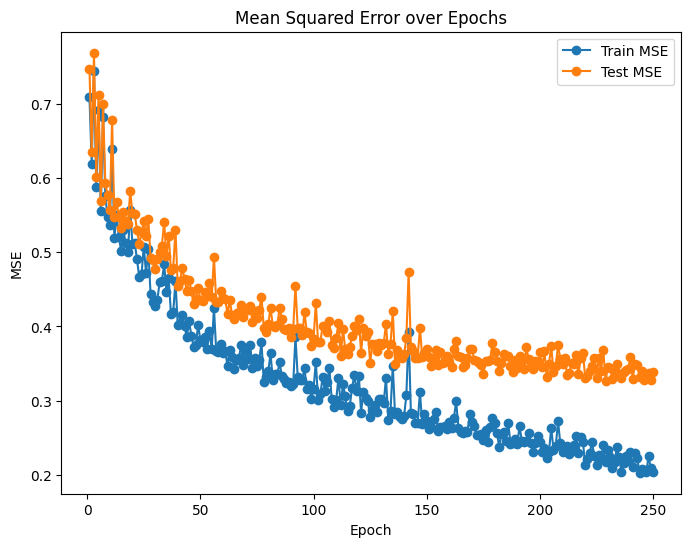

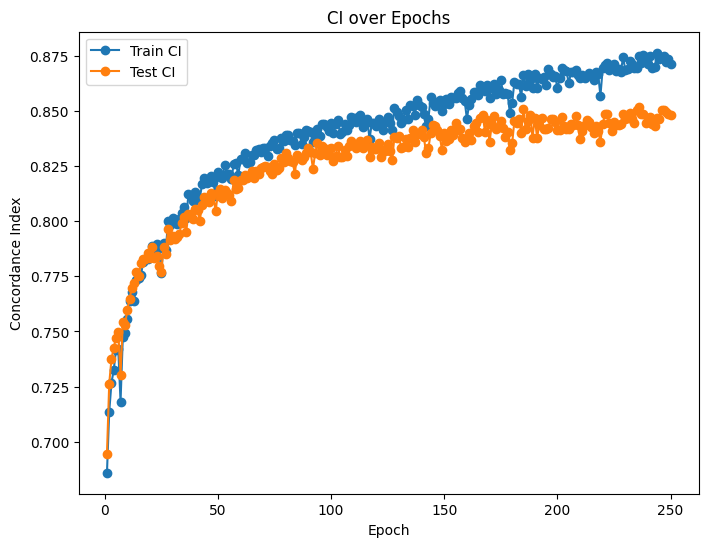

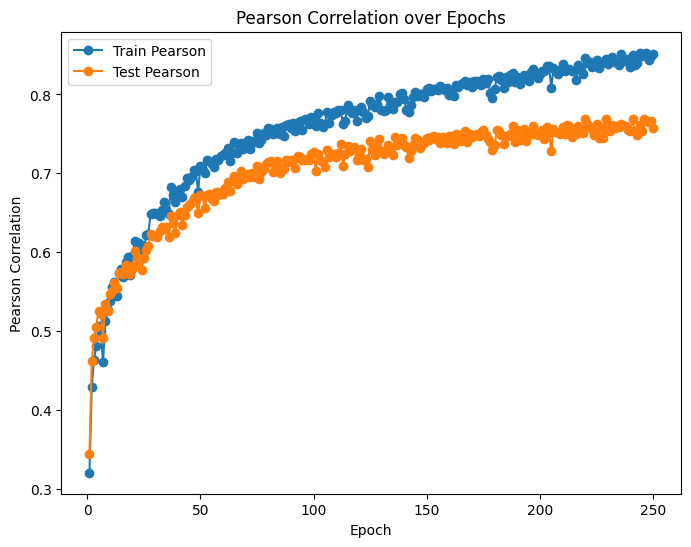

In [3]:
#model 1
import os
import warnings
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn import MSELoss
from torch_geometric.nn import GCNConv, global_mean_pool as gep
from torch_geometric.data import Data, Batch
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np

# Optional, for plotting:
import matplotlib.pyplot as plt

##############################################################################
#                               1. METRICS
##############################################################################

@torch.no_grad()
def ci_vectorized(preds: torch.Tensor, targets: torch.Tensor) -> float:
    """
    Naive O(N^2) Concordance Index using vectorized GPU operations.
    preds, targets: (N,) on the same device (e.g. cuda).
    """
    # (N, N) differences
    p_diff = preds.unsqueeze(1) - preds.unsqueeze(0)
    t_diff = targets.unsqueeze(1) - targets.unsqueeze(0)
    # mask out pairs where targets are identical
    mask = (t_diff != 0)
    # sign of product => +1 (concordant), 0 (tie), -1 (discordant)
    sign_mat = torch.sign(p_diff * t_diff)
    # step function h(x): 1 if x>0, 0.5 if x=0, 0 if x<0
    h = (sign_mat == 1).float() + 0.5 * (sign_mat == 0).float()
    # apply mask
    h_masked = h * mask.float()
    c = h_masked.sum()
    s = mask.sum().float()
    return (c / s).item() if s > 0 else 0.0

@torch.no_grad()
def mse_torch(preds: torch.Tensor, targets: torch.Tensor) -> float:
    """
    GPU-friendly MSE using torch's built-in mean squared error.
    """
    return F.mse_loss(preds, targets, reduction='mean').item()

@torch.no_grad()
def pearson_torch(preds: torch.Tensor, targets: torch.Tensor) -> float:
    """
    Pearson correlation coefficient in PyTorch (GPU-friendly).
    preds, targets: (N,) on the same device
    """
    p_centered = preds - preds.mean()
    t_centered = targets - targets.mean()
    cov = (p_centered * t_centered).sum()
    denom = torch.sqrt((p_centered**2).sum()) * torch.sqrt((t_centered**2).sum())
    eps = 1e-8
    return (cov / (denom + eps)).item()

##############################################################################
#                       2. GNN MODEL DEFINITION
##############################################################################

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool as gep


class BidirectionalCrossAttention(nn.Module):
    def __init__(self, mol_dim, pro_dim, attn_dim=64, chunk_size=2048):
        super().__init__()
        """
        Handles different input dimensions through asymmetric projections:
        
        For Molecule→Protein attention:
            Q_mol ∈ ℝ^{mol_dim} → ℝ^{attn_dim}
            K_pro ∈ ℝ^{pro_dim} → ℝ^{attn_dim}
            V_pro ∈ ℝ^{pro_dim} → ℝ^{mol_dim}
            
        For Protein→Molecule attention:
            Q_pro ∈ ℝ^{pro_dim} → ℝ^{attn_dim}
            K_mol ∈ ℝ^{mol_dim} → ℝ^{attn_dim}
            V_mol ∈ ℝ^{mol_dim} → ℝ^{pro_dim}
        """
        # Molecule → Protein attention
        self.W_Q_mol = nn.Linear(mol_dim, attn_dim)
        self.W_K_pro = nn.Linear(pro_dim, attn_dim)
        self.W_V_pro = nn.Linear(pro_dim, mol_dim)
        
        # Protein → Molecule attention
        self.W_Q_pro = nn.Linear(pro_dim, attn_dim)
        self.W_K_mol = nn.Linear(mol_dim, attn_dim)
        self.W_V_mol = nn.Linear(mol_dim, pro_dim)
        
        self.scale = 1.0 / torch.sqrt(torch.tensor(attn_dim, dtype=torch.float32))
        self.chunk_size = chunk_size

    def forward(self, X_mol, X_pro, batch_mol, batch_pro):
        """
        X_mol: [N_mol, mol_dim]
        X_pro: [N_pro, pro_dim]
        """
        # --- Molecule → Protein Attention ---
        Q_mol = self.W_Q_mol(X_mol)  # [N_mol, attn_dim]
        K_pro = self.W_K_pro(X_pro)  # [N_pro, attn_dim]
        V_pro = self.W_V_pro(X_pro)  # [N_pro, mol_dim]
        
        # Compute attention scores
        mask = self._create_mask(batch_mol, batch_pro)
        Z_mol = self._chunked_attention(Q_mol, K_pro, V_pro, mask)
        
        # --- Protein → Molecule Attention ---
        Q_pro = self.W_Q_pro(X_pro)  # [N_pro, attn_dim]
        K_mol = self.W_K_mol(X_mol)  # [N_mol, attn_dim]
        V_mol = self.W_V_mol(X_mol)  # [N_mol, pro_dim]
        
        mask_t = mask.T
        Z_pro = self._chunked_attention(Q_pro, K_mol, V_mol, mask_t)
        
        return Z_mol, Z_pro

    def _chunked_attention(self, Q, K, V, mask):
        output = []
        for i in range(0, Q.size(0), self.chunk_size):
            Q_chunk = Q[i:i+self.chunk_size]
            scores = (Q_chunk @ K.T) * self.scale
            scores = scores.masked_fill(~mask[i:i+self.chunk_size], -1e9)
            attn = F.softmax(scores, dim=-1)
            output_chunk = attn @ V
            output.append(output_chunk)
        return torch.cat(output, dim=0)

    def _create_mask(self, batch_A, batch_B):
        return batch_A.unsqueeze(1) == batch_B.unsqueeze(0)
#############################################
# Updated GNN Model with Cross-Attention (No Extra Projection)
#############################################

def apply_stochastic_depth(layer_fn, x, y, survival_prob, training):
    """
    Applies stochastic depth to a module.
    
    Args:
        layer_fn: a function (or module) that computes the layer output.
        x: input from branch A.
        y: input from branch B.
        survival_prob (float): Probability of using the layer.
        training (bool): Whether we are in training mode.
    
    Returns:
        The outputs (Xnew, XtNew) computed by the layer or skipped.
    """
    # In evaluation mode, always use the layer.
    if not training:
        return layer_fn(x, y)
    
    # In training, decide randomly.
    if torch.rand(1).item() < survival_prob:
        # Use the layer normally.
        return layer_fn(x, y)
    else:
        # Skip the layer: simply return the inputs (i.e. bypass cross-attention)
        return x, y

class GNNNet(torch.nn.Module):
    def __init__(self, n_output=1, num_features_pro=54, num_features_mol=78, output_dim=128, dropout=0.2):
        super(GNNNet, self).__init__()
        print('GNNNet Loaded')
        self.n_output = n_output
        
        # --- Molecule branch GCN layers ---
        self.mol_conv1 = GCNConv(num_features_mol, num_features_mol)
        self.mol_conv2 = GCNConv(num_features_mol, num_features_mol * 2)
        self.mol_conv3 = GCNConv(num_features_mol * 2, num_features_mol * 4)
        
        self.mol_fc_g1 = nn.Linear(num_features_mol * 4, 1024)
        self.mol_fc_g2 = nn.Linear(1024, output_dim)
        
        # --- Protein branch GCN layers ---
        self.pro_conv1 = GCNConv(num_features_pro, num_features_pro)
        self.pro_conv2 = GCNConv(num_features_pro, num_features_pro * 2)
        self.pro_conv3 = GCNConv(num_features_pro * 2, num_features_pro * 4)
        
        self.pro_fc_g1 = nn.Linear(num_features_pro * 4, 1024)
        self.pro_fc_g2 = nn.Linear(1024, output_dim)
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)
        self.dropout2 = nn.Dropout(0.3)
        self.dropout3 = nn.Dropout(0.5)
        
        # --- Bidirectional Cross-Attention ---
        self.cross_attn1 = BidirectionalCrossAttention(mol_dim=num_features_mol, pro_dim=num_features_pro ,attn_dim=128)
        self.cross_attn2 = BidirectionalCrossAttention(mol_dim=num_features_mol * 2, pro_dim=num_features_pro * 2 ,attn_dim=512)
        
        
        # --- Combined FC layers ---
        self.fc1 = nn.Linear(2 * output_dim, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.out = nn.Linear(512, self.n_output)

        self.survival_prob = 0.7

    def forward(self, data_mol, data_pro):
        # Unpack molecule graph data
        mol_x, mol_edge_index, mol_batch = data_mol.x, data_mol.edge_index, data_mol.batch
        # Unpack protein graph data
        target_x, target_edge_index, target_batch = data_pro.x, data_pro.edge_index, data_pro.batch

        # --- Molecule branch: GCN1 ---
        x = self.mol_conv1(mol_x, mol_edge_index)
        x = self.relu(x)
        # --- Molecule branch: GCN2 ---
        x = self.mol_conv2(x, mol_edge_index)
        x = self.relu(x)
        x = self.dropout(x)
        

        # --- Protein branch: GCN1 ---
        xt = self.pro_conv1(target_x, target_edge_index)
        xt = self.relu(xt)
        # --- Protein branch: GCN2 ---
        xt = self.pro_conv2(xt, target_edge_index)
        xt = self.relu(xt)
        xt = self.dropout(xt)
        
        
        # --- Apply second cross-attention ---
        def cross_attn_fn2(a, b):
            return self.cross_attn2(a, b, mol_batch, target_batch)

        Xnew, XtNew = apply_stochastic_depth(cross_attn_fn2, x, xt, self.survival_prob, self.training)
        Xnew = self.dropout2(Xnew)
        XtNew = self.dropout2(XtNew)
        
        # --- Molecule branch: GCN3 ---
        x_updated = self.mol_conv3(Xnew, mol_edge_index)
        x_updated = self.relu(x_updated)
        x_pooled = gep(x_updated, mol_batch)
        
        # --- Protein branch: GCN3 ---
        xt_updated = self.pro_conv3(XtNew, target_edge_index)
        xt_updated = self.relu(xt_updated)
        xt_pooled = gep(xt_updated, target_batch)
        
        # --- Flatten branch outputs through FC layers ---
        x_final = self.mol_fc_g2(self.relu(self.mol_fc_g1(x_pooled)))
        x_final = self.dropout(x_final)
        xt_final = self.pro_fc_g2(self.relu(self.pro_fc_g1(xt_pooled)))
        xt_final = self.dropout(xt_final)
        
        # --- Concatenate and apply combined FC layers ---
        xc = torch.cat((x_final, xt_final), dim=1)
        xc = self.fc1(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        xc = self.fc2(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        out = self.out(xc)
        
        return out
##############################################################################
#                   3. DATA LOADING HELPERS
##############################################################################

warnings.filterwarnings('ignore', category=FutureWarning)

def load_sample(path):
    """
    Load a .pt sample, fix up 'x' and 'edge_index', return (mol_data, pro_data, target).
    """
    sample = torch.load(path)
    mol_data, pro_data, target = sample[0], sample[1], sample[2]

    # Convert dict to Data if needed
    if isinstance(mol_data, dict):
        mol_data = Data(**mol_data)
    if isinstance(pro_data, dict):
        pro_data = Data(**pro_data)

    # Fix x
    if not hasattr(mol_data, 'x') or mol_data.x is None:
        if hasattr(mol_data, 'features'):
            mol_data.x = mol_data.features
            del mol_data.features
        else:
            raise ValueError("mol_data missing 'x' or 'features'")
    if not hasattr(pro_data, 'x') or pro_data.x is None:
        if hasattr(pro_data, 'features'):
            pro_data.x = pro_data.features
            del pro_data.features
        else:
            raise ValueError("pro_data missing 'x' or 'features'")

    mol_data.x = torch.as_tensor(mol_data.x, dtype=torch.float32)
    pro_data.x = torch.as_tensor(pro_data.x, dtype=torch.float32)

    # Fix edge_index
    def fix_edge_index(d):
        if not isinstance(d.edge_index, torch.Tensor):
            d.edge_index = torch.tensor(d.edge_index, dtype=torch.long)
        else:
            d.edge_index = d.edge_index.long()
        if d.edge_index.shape[0] != 2:
            d.edge_index = d.edge_index.t()
        d.num_nodes = d.x.size(0)

    fix_edge_index(mol_data)
    fix_edge_index(pro_data)

    return (mol_data, pro_data, target)

def batch_loader(file_list, sample_dir, batch_size):
    """
    Yields batches of (mol_data, pro_data, target) from file_list.
    """
    batch = []
    for file_name in file_list:
        path = os.path.join(sample_dir, file_name)
        sample = load_sample(path)
        batch.append(sample)
        if len(batch) == batch_size:
            yield batch
            batch = []
    if batch:
        yield batch

##############################################################################
#              4. TRAINING / EVALUATION WITH METRICS EACH EPOCH
##############################################################################

import os
import torch

def train_and_evaluate(sample_dir, num_epochs=10, test_size=0.2, lr=0.001):
    """
    Trains the GNN model, evaluates on train & test each epoch, saves metrics + checkpoints.
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Running on {device}.")

    # Gather samples
    sample_files = [f for f in os.listdir(sample_dir) if f.endswith('.pt')]
    assert len(sample_files) > 0, "No .pt files found in sample_dir!"

    # Split
    train_files, test_files = train_test_split(sample_files, test_size=test_size, random_state=42)

    # Make checkpoint dir
    training_model_dir = os.path.join(os.getcwd(), 'TrainingModel1')
    os.makedirs(training_model_dir, exist_ok=True)
    print(f"Checkpoints will be saved to: {training_model_dir}")

    metrics_path = os.path.join(training_model_dir, "training_metrics.pt")

    # Load existing metrics if available (Ensures metrics continue from previous runs)
    if os.path.exists(metrics_path):
        saved_metrics = torch.load(metrics_path)
        train_metrics = saved_metrics['train_metrics']
        test_metrics = saved_metrics['test_metrics']
        print("Loaded previous training metrics!")
    else:
        train_metrics = {'epoch': [], 'mse': [], 'ci': [], 'pearson': []}
        test_metrics = {'epoch': [], 'mse': [], 'ci': [], 'pearson': []}
        print("Starting fresh metrics tracking.")

    # Infer input dims from one sample
    sample0 = load_sample(os.path.join(sample_dir, train_files[0]))
    mol_data0, pro_data0 = sample0[0], sample0[1]
    num_features_mol = mol_data0.x.size(1)
    num_features_pro = pro_data0.x.size(1)

    # Initialize model
    model = GNNNet(num_features_mol=num_features_mol,
                   num_features_pro=num_features_pro).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = MSELoss()

    # Possibly resume from checkpoint
    start_epoch = 1
    existing_checkpoints = [
        f for f in os.listdir(training_model_dir)
        if f.endswith('.pt') and f.startswith('model_epoch')
    ]
    last_ckpt_path = None  # Track previous checkpoint for deletion

    if existing_checkpoints:
        latest_ckpt = max(existing_checkpoints, key=lambda x: int(x.split('_epoch')[1].split('.pt')[0]))
        ckpt_path = os.path.join(training_model_dir, latest_ckpt)
        print(f"Loading checkpoint from {ckpt_path}")
        ckpt = torch.load(ckpt_path, map_location=device)
        model.load_state_dict(ckpt['model_state_dict'])
        optimizer.load_state_dict(ckpt['optimizer_state_dict'])
        loaded_epoch = ckpt['epoch']
        start_epoch = loaded_epoch + 1
        last_ckpt_path = ckpt_path  # Store last checkpoint path for deletion
        print(f"Resuming from epoch {start_epoch}")
    else:
        print("No existing checkpoint found; starting fresh.")

    @torch.no_grad()
    def evaluate(files):
        model.eval()
        all_preds = []
        all_targets = []
        batch_eval_size = 200
        for batch_samples in batch_loader(files, sample_dir, batch_eval_size):
            mol_list, pro_list, tgt_list = [], [], []
            for (md, pd, t) in batch_samples:
                mol_list.append(md)
                pro_list.append(pd)
                tgt_list.append(t)

            mol_batch = Batch.from_data_list(mol_list).to(device)
            pro_batch = Batch.from_data_list(pro_list).to(device)
            t_tensor = torch.tensor(tgt_list, dtype=torch.float32, device=device)

            out = model(mol_batch, pro_batch).view(-1)
            all_preds.append(out)
            all_targets.append(t_tensor)

        all_preds = torch.cat(all_preds, dim=0)
        all_targets = torch.cat(all_targets, dim=0)

        mse_val = mse_torch(all_preds, all_targets)
        ci_val = ci_vectorized(all_preds, all_targets)
        pearson_val = pearson_torch(all_preds, all_targets)
        return mse_val, ci_val, pearson_val

    # Training loop
    batch_size = 50
    for epoch in tqdm(range(start_epoch, num_epochs + 1), desc="Training", unit="epoch"):
        model.train()
        running_loss = 0.0

        for batch_samples in batch_loader(train_files, sample_dir, batch_size):
            mol_list, pro_list, tgt_list = [], [], []
            for (md, pd, t) in batch_samples:
                mol_list.append(md)
                pro_list.append(pd)
                tgt_list.append(t)

            mol_batch = Batch.from_data_list(mol_list).to(device)
            pro_batch = Batch.from_data_list(pro_list).to(device)
            t_tensor = torch.tensor(tgt_list, dtype=torch.float32, device=device).view(-1)

            optimizer.zero_grad()
            out = model(mol_batch, pro_batch).view(-1)
            loss = loss_fn(out, t_tensor)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * len(batch_samples)

        avg_loss = running_loss / len(train_files)
        tqdm.write(f"[Epoch {epoch}/{num_epochs}] Training Loss: {avg_loss:.4f}")

        # Evaluate on train & test
        train_mse, train_ci, train_pearson = evaluate(train_files)
        test_mse, test_ci, test_pearson = evaluate(test_files)

        train_metrics['epoch'].append(epoch)
        train_metrics['mse'].append(train_mse)
        train_metrics['ci'].append(train_ci)
        train_metrics['pearson'].append(train_pearson)

        test_metrics['epoch'].append(epoch)
        test_metrics['mse'].append(test_mse)
        test_metrics['ci'].append(test_ci)
        test_metrics['pearson'].append(test_pearson)

        tqdm.write(f"  Train => MSE={train_mse:.4f}, CI={train_ci:.4f}, Pearson={train_pearson:.4f}")
        tqdm.write(f"  Test  => MSE={test_mse:.4f}, CI={test_ci:.4f}, Pearson={test_pearson:.4f}")

        # Save new checkpoint
        ckpt_name = f"model_epoch{epoch}.pt"
        ckpt_path = os.path.join(training_model_dir, ckpt_name)
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
        }, ckpt_path)
        tqdm.write(f"Checkpoint saved at epoch {epoch}")

        # Delete the previous checkpoint after saving the new one
        if last_ckpt_path and os.path.exists(last_ckpt_path):
            os.remove(last_ckpt_path)
            tqdm.write(f"Deleted previous checkpoint: {last_ckpt_path}")

        # Update last checkpoint path
        last_ckpt_path = ckpt_path

        # Save/Update the metrics after each epoch
        torch.save({
            'train_metrics': train_metrics,
            'test_metrics': test_metrics
        }, metrics_path)

    # Final evaluations
    final_train_mse, final_train_ci, final_train_pearson = evaluate(train_files)
    final_test_mse, final_test_ci, final_test_pearson = evaluate(test_files)
    print(f"\nFinal Train => MSE={final_train_mse:.4f}, CI={final_train_ci:.4f}, Pearson={final_train_pearson:.4f}")
    print(f"Final Test  => MSE={final_test_mse:.4f}, CI={final_test_ci:.4f}, Pearson={final_test_pearson:.4f}")

    # Save final metrics
    torch.save({
        'train_metrics': train_metrics,
        'test_metrics': test_metrics
    }, metrics_path)
    print(f"Metrics saved to {metrics_path}")

    return train_metrics, test_metrics


##############################################################################
#               5. OPTIONAL: PLOT THE SAVED METRICS
##############################################################################

def plot_metrics(checkpoint_dir='TrainingModel1'):
    """
    Load training_metrics.pt from the checkpoint_dir and plot MSE, CI, Pearson over epochs.
    """
    metrics_path = os.path.join(checkpoint_dir, "training_metrics.pt")
    if not os.path.exists(metrics_path):
        print(f"No metrics file found at {metrics_path}!")
        return

    saved_data = torch.load(metrics_path)
    train_metrics = saved_data['train_metrics']
    test_metrics = saved_data['test_metrics']
    epochs = train_metrics['epoch']

    # Plot MSE
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_metrics['mse'], 'o-', label='Train MSE')
    plt.plot(epochs, test_metrics['mse'], 'o-', label='Test MSE')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.title('Mean Squared Error over Epochs')
    plt.legend()
    plt.savefig(os.path.join(checkpoint_dir, "MSE_plot.png"))  
    plt.show()

    # Plot CI
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_metrics['ci'], 'o-', label='Train CI')
    plt.plot(epochs, test_metrics['ci'], 'o-', label='Test CI')
    plt.xlabel('Epoch')
    plt.ylabel('Concordance Index')
    plt.title('CI over Epochs')
    plt.legend()
    plt.savefig(os.path.join(checkpoint_dir, "CI_plot.png"))  
    plt.show()

    # Plot Pearson
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_metrics['pearson'], 'o-', label='Train Pearson')
    plt.plot(epochs, test_metrics['pearson'], 'o-', label='Test Pearson')
    plt.xlabel('Epoch')
    plt.ylabel('Pearson Correlation')
    plt.title('Pearson Correlation over Epochs')
    plt.legend()
    plt.savefig(os.path.join(checkpoint_dir, "PEARSON_plot.png"))  
    plt.show()

##############################################################################
#                                 MAIN
##############################################################################

if __name__ == "__main__":
    # Adjust the paths/parameters as needed
    SAMPLE_DIR = "prepared_samples"   # Directory with your .pt samples
    NUM_EPOCHS = 250
    TEST_SPLIT = 0.2
    LR = 0.001

    # 1) Train and evaluate
    train_metrics, test_metrics = train_and_evaluate(
        sample_dir=SAMPLE_DIR,
        num_epochs=NUM_EPOCHS,
        test_size=TEST_SPLIT,
        lr=LR
    )

    # 2) Plot the metrics
    plot_metrics('TrainingModel1')

